# COGNIZANT VIRTUAL INTERSHIP-TASK 4(ML MODELLING)

# **IMPORTING REQUIRED LIBRARIES**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',25)
pd.set_option('display.max_rows',300)
plt.rcParams['axes.facecolor']='#99ffcc'
import warnings
warnings.filterwarnings('ignore')

# **IMPORTING DATASETS AND MERGING INTO SINGLE DATAFRAME**

In [53]:
sales=pd.read_csv('/kaggle/input/cognizant-artificial-intelligence/data for modeling/sales.csv')
#sensor stock levels
ssl=pd.read_csv('/kaggle/input/cognizant-artificial-intelligence/data for modeling/sensor_stock_levels.csv')
#sensor storage temperature
sst=pd.read_csv('/kaggle/input/cognizant-artificial-intelligence/data for modeling/sensor_storage_temperature.csv')

In [54]:
sales.sample(4)

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
5436,5436,e07caa0e-050d-4fe6-a401-b99f229aba1e,2022-03-06 18:28:52,508c8cb7-6447-4c2f-8843-84aeac9b0aad,baked goods,gold,4.19,4,16.76,debit card
6859,6859,6c79d5e9-28e5-4338-8d8e-3c6a5b889952,2022-03-03 10:16:15,d6aec25d-8af7-4661-9917-4d71d1587a6f,personal care,non-member,5.19,2,10.38,cash
960,960,47ae603c-4864-46e4-aa3f-a120618d2dd1,2022-03-07 15:54:39,14736243-d346-438f-9535-d80fcb9f3882,fruit,basic,1.49,2,2.98,credit card
4457,4457,96b14f29-7002-40de-814e-4bf90023e1e0,2022-03-04 15:09:18,951aba8f-b7fc-4fba-b188-b9978cb96304,cheese,non-member,5.49,3,16.47,cash


In [55]:
ssl.head()
#['id', 'timestamp', 'product_id', 'estimated_stock_pct']

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [56]:
sst.head()
#['id', 'timestamp', 'temperature']

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [57]:
m1=pd.merge(sales,ssl,on=['product_id'])
m1.sample(5)
#['id', 'timestamp', 'product_id', 'estimated_stock_pct']

,Unnamed: 0_x,transaction_id,timestamp_x,product_id,category,customer_type,unit_price,quantity,total,payment_type,Unnamed: 0_y,id,timestamp_y,estimated_stock_pct
404673,7504,b3c5386a-e0df-4d15-98f0-909d9a12a135,2022-03-05 13:51:32,0f493675-d59d-45dd-9406-084932bf41c1,kitchen,non-member,13.19,1,13.19,credit card,2007,32d7bb99-874b-477f-83b4-926e82175409,2022-03-06 19:21:15,0.13
380903,6797,d998a270-e65d-4bcd-8b1a-03721a8d2ed7,2022-03-03 16:59:38,75d576b8-dab5-4663-9523-ec5f07819535,personal care,standard,6.99,3,20.97,debit card,4952,b140c344-1084-43f2-98d8-ce59bce8f9a5,2022-03-01 14:52:48,0.47
346105,6141,6a0ccd7e-dc36-4738-8235-3ed15a21af4d,2022-03-01 10:28:52,32a2ea10-8010-4046-bf34-2117692ebd4a,snacks,premium,3.19,1,3.19,cash,11977,f9b04faa-bb60-44f4-a56a-59c09b4d01b1,2022-03-03 13:21:22,0.51
362671,6483,659a75dd-ff33-4dbc-95aa-10e572ac7fe2,2022-03-07 17:16:47,3ff2b6a7-3ceb-44e5-bed4-bd96bed752c4,baby products,gold,15.19,4,60.76,cash,6444,234c50ef-4dba-4be5-b6f9-64f223756fd3,2022-03-07 10:27:55,0.35
347546,6126,db4e7c9b-e4b5-4d2a-a78b-9168807a19e0,2022-03-07 15:09:49,3fbf5c52-e83a-4476-8475-07ce81e1bdb8,snacks,standard,3.99,2,7.98,cash,7490,dd8c53a1-2a7e-4f86-b503-8f7111f87664,2022-03-05 11:47:33,0.52


In [58]:
sst.columns=['Unnamed: 0', 'id', 'timestamp_x', 'temperature']

In [59]:
fdf=pd.merge(m1,sst,on='timestamp_x')
fdf.head()

,Unnamed: 0_x,transaction_id,timestamp_x,product_id,category,customer_type,unit_price,quantity,total,payment_type,Unnamed: 0_y,id_x,timestamp_y,estimated_stock_pct,Unnamed: 0,id_y,temperature
0,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,164,5540da96-885e-4d17-aa33-5720ca9b57d5,2022-03-03 09:16:02,0.25,15854,38808b9d-712c-4703-a5ae-920817960fa6,-2.84
1,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,172,e65514e8-2935-4921-baf8-2a9cf849a7f2,2022-03-04 17:52:19,0.23,15854,38808b9d-712c-4703-a5ae-920817960fa6,-2.84
2,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,242,1faae309-bd2c-412c-b988-42e3086e2e86,2022-03-07 12:44:46,0.80,15854,38808b9d-712c-4703-a5ae-920817960fa6,-2.84
3,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,343,d383beb7-6dd0-46b3-aaa3-a1141e0c94dd,2022-03-02 17:36:38,0.79,15854,38808b9d-712c-4703-a5ae-920817960fa6,-2.84
4,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,465,9c0d4cbe-c00d-42c2-8489-263188ae0b17,2022-03-07 09:44:25,0.86,15854,38808b9d-712c-4703-a5ae-920817960fa6,-2.84


In [60]:
dr=['transaction_id','Unnamed: 0_x', 'id_x','Unnamed: 0_y', 'id_y','timestamp_y','Unnamed: 0']
fdf.drop(columns=dr,inplace=True,axis=1)

In [61]:
fdf.head()

,timestamp_x,product_id,category,customer_type,unit_price,quantity,total,payment_type,estimated_stock_pct,temperature
0,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.25,-2.84
1,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.23,-2.84
2,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.80,-2.84
3,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.79,-2.84
4,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.86,-2.84


In [62]:
fdf.columns=['timestamp', 'prd_id', 'category', 'customer_type', 'unit_price',
       'quantity', 'total', 'payment_type', 'avg_stk_prc',
       'temperature']

In [63]:
fdf.head()

,timestamp,prd_id,category,customer_type,unit_price,quantity,total,payment_type,avg_stk_prc,temperature
0,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.25,-2.84
1,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.23,-2.84
2,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.80,-2.84
3,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.79,-2.84
4,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.86,-2.84


# **DATA PREPROCESSING**

In [64]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38942 entries, 0 to 38941
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      38942 non-null  object 
 1   prd_id         38942 non-null  object 
 2   category       38942 non-null  object 
 3   customer_type  38942 non-null  object 
 4   unit_price     38942 non-null  float64
 5   quantity       38942 non-null  int64  
 6   total          38942 non-null  float64
 7   payment_type   38942 non-null  object 
 8   avg_stk_prc    38942 non-null  float64
 9   temperature    38942 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 3.0+ MB


In [65]:
fdf['timestamp']=pd.to_datetime(fdf['timestamp'])
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38942 entries, 0 to 38941
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      38942 non-null  datetime64[ns]
 1   prd_id         38942 non-null  object        
 2   category       38942 non-null  object        
 3   customer_type  38942 non-null  object        
 4   unit_price     38942 non-null  float64       
 5   quantity       38942 non-null  int64         
 6   total          38942 non-null  float64       
 7   payment_type   38942 non-null  object        
 8   avg_stk_prc    38942 non-null  float64       
 9   temperature    38942 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 3.0+ MB


In [66]:
fdf['week']=fdf['timestamp'].dt.dayofweek
fdf['day']=fdf['timestamp'].dt.day
fdf['hour']=fdf['timestamp'].dt.hour

In [67]:
sum(fdf.duplicated())

9237

In [68]:
dups=fdf.duplicated()
ndf=fdf[~dups]
ndf

,timestamp,prd_id,category,customer_type,unit_price,quantity,total,payment_type,avg_stk_prc,temperature,week,day,hour
0,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.25,-2.84,0,7,17
1,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.23,-2.84,0,7,17
2,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.80,-2.84,0,7,17
3,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.79,-2.84,0,7,17
4,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.86,-2.84,0,7,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38936,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.68,-1.33,0,7,11
38938,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.67,-1.33,0,7,11
38939,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.92,-1.33,0,7,11
38940,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.21,-1.33,0,7,11


In [69]:
from scipy.stats import probplot

In [70]:
ifc=['unit_price', 'quantity', 'total', 'avg_stk_prc', 'temperature', 'week',
       'day', 'hour']


def histandbox(a, b):
    fig, axs = plt.subplots(1, 2, figsize=(20, 4))
    sns.histplot(data=b, x=a, ax=axs[0], kde=True, color='#9966ff')
    probplot(b[a],plot=axs[1])
    fig.suptitle(f"HISTOGRAM AND Q-Q PLOT OF: {a}", fontsize=20)
    plt.show()

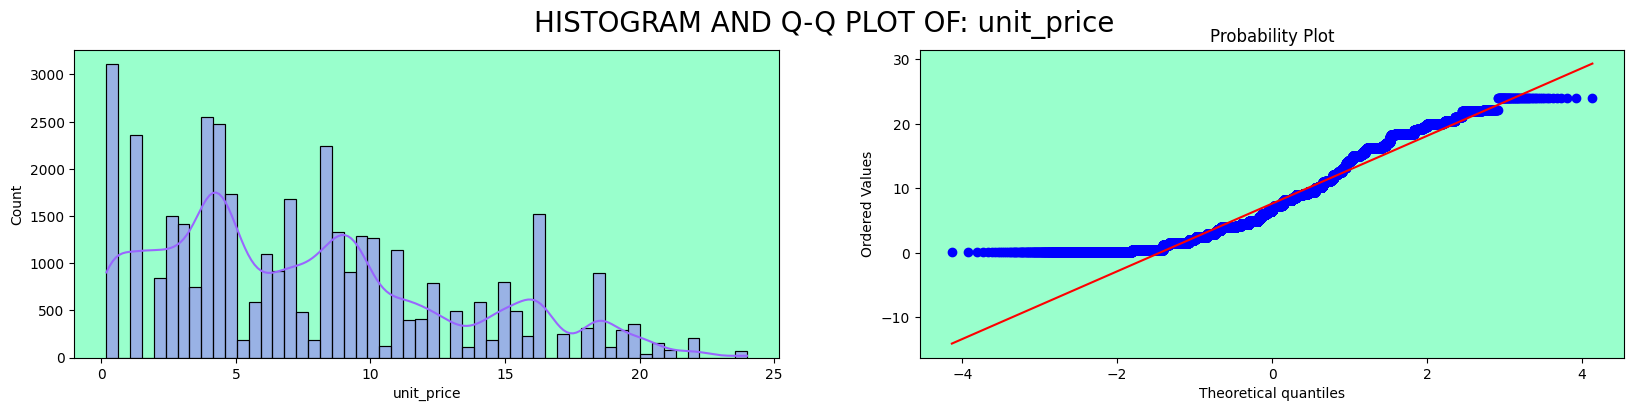

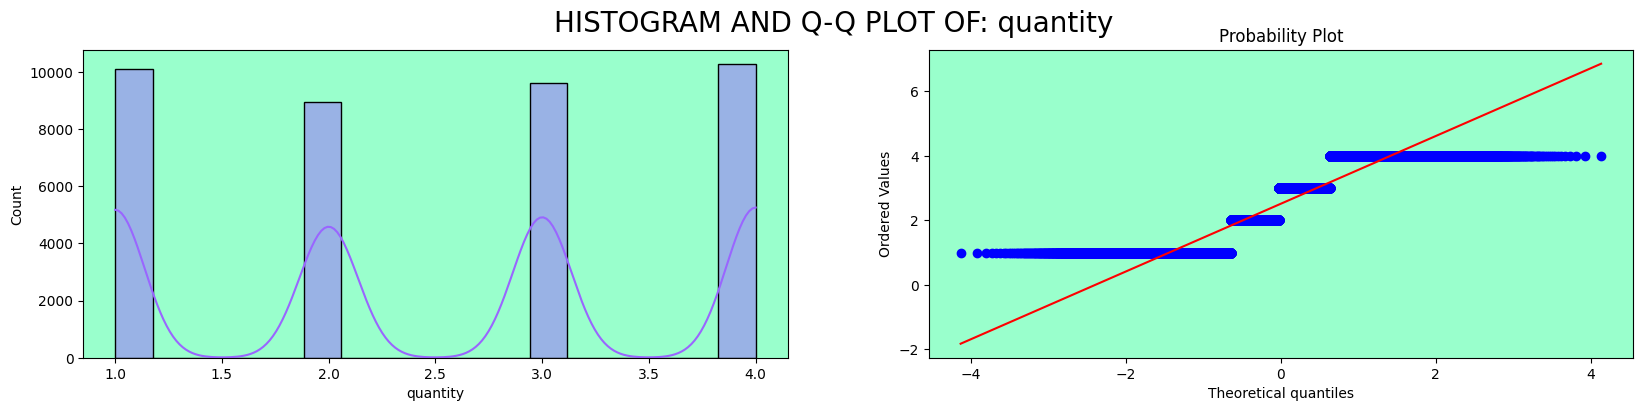

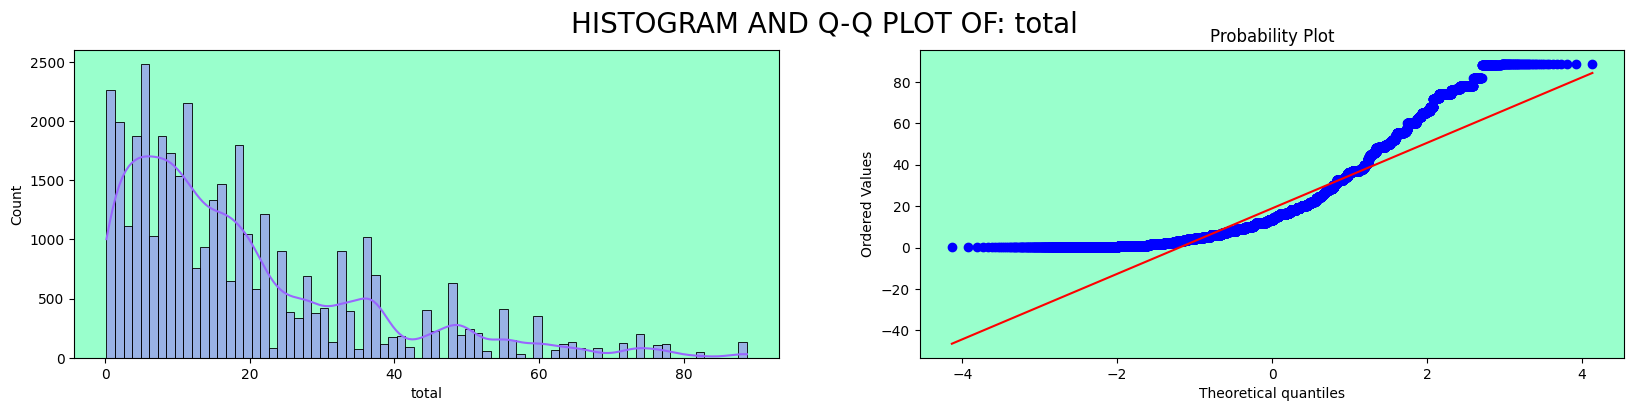

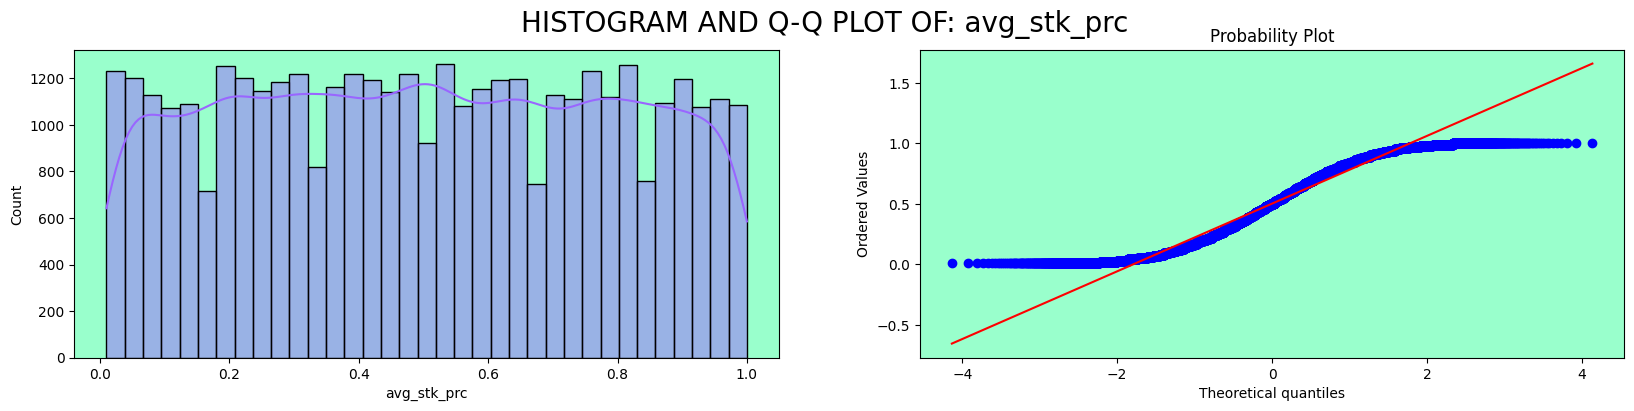

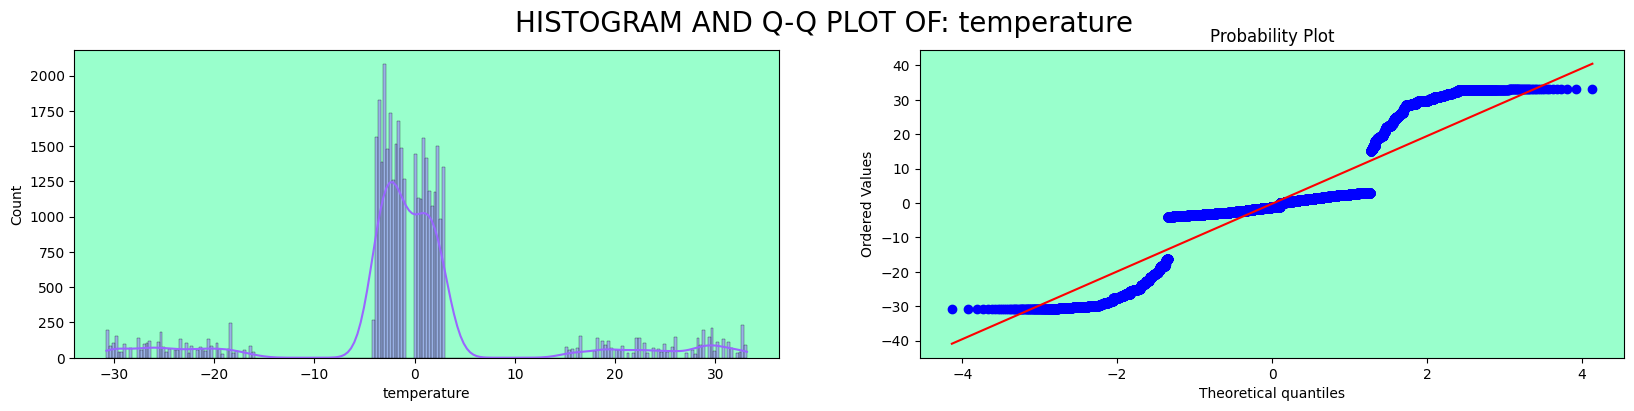

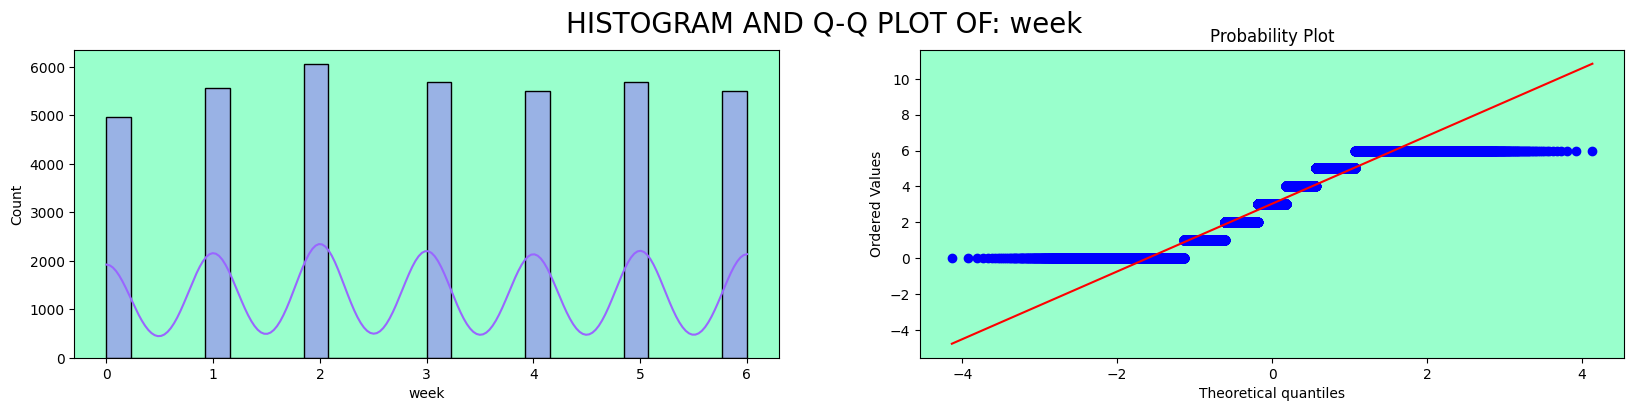

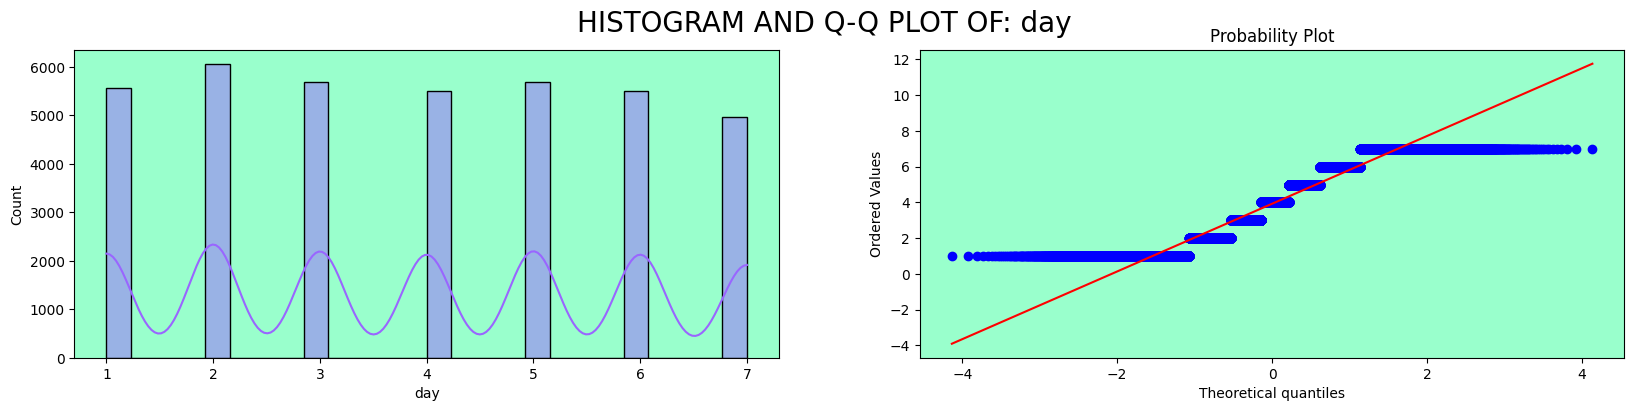

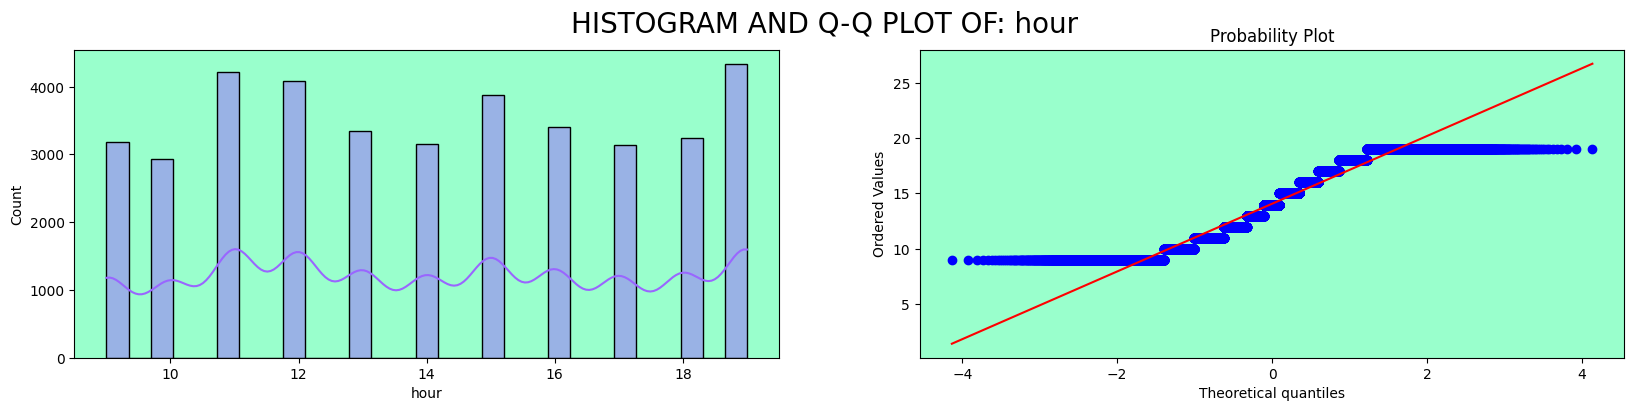

In [71]:
for i in ifc:
    histandbox(i,fdf)

# **OUTLIER DETECTION AND REMOVAL OF INTER-QUARTILE RANGE METHOD** 
coefficient calculation towards sigma value

* = Q1 - 1.722 * IQR
* = Q1 - 1.722 * (Q3 - Q1)
* = -0.675σ - 1.722 * (0.675 - [-0.675])σ
* = -0.675σ - 1.722* 1.35σ
* = -2.99σ
* ~=3sigma

In [72]:
#outliers
c=fdf.select_dtypes(include=['int','float']).columns
q1=fdf[c].quantile(.25)
q3=fdf[c].quantile(.75)
iqr=q3-q1
ll=q1-1.722*iqr
ul=q3+1.722*iqr
mask=fdf[~(fdf[c]>ul)|(fdf[c]<ll)].all(axis=1)
cdf=fdf[mask]
cdf.head(3)

,timestamp,prd_id,category,customer_type,unit_price,quantity,total,payment_type,avg_stk_prc,temperature,week,day,hour
69,2022-03-01 14:58:07,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,premium,3.99,4,15.96,e-wallet,0.25,29.73,1,1,14
70,2022-03-01 14:58:07,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,premium,3.99,4,15.96,e-wallet,0.23,29.73,1,1,14
71,2022-03-01 14:58:07,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,premium,3.99,4,15.96,e-wallet,0.80,29.73,1,1,14


In [73]:
cdf.drop(columns=['timestamp', 'prd_id'],axis=1,inplace=True)

In [74]:
cdf.select_dtypes(include=['int','float']).columns

Index(['unit_price', 'quantity', 'total', 'avg_stk_prc', 'temperature', 'week',
       'day', 'hour'],
      dtype='object')

In [75]:
from sklearn.preprocessing import PowerTransformer,QuantileTransformer

f=['unit_price', 'quantity', 'total', 'avg_stk_prc', 'temperature', 'week',
       'day', 'hour']

# **DISTRIBUTION -- FEATURE TRANSOFORMATION**

In [76]:
from sklearn.preprocessing import MaxAbsScaler,Normalizer

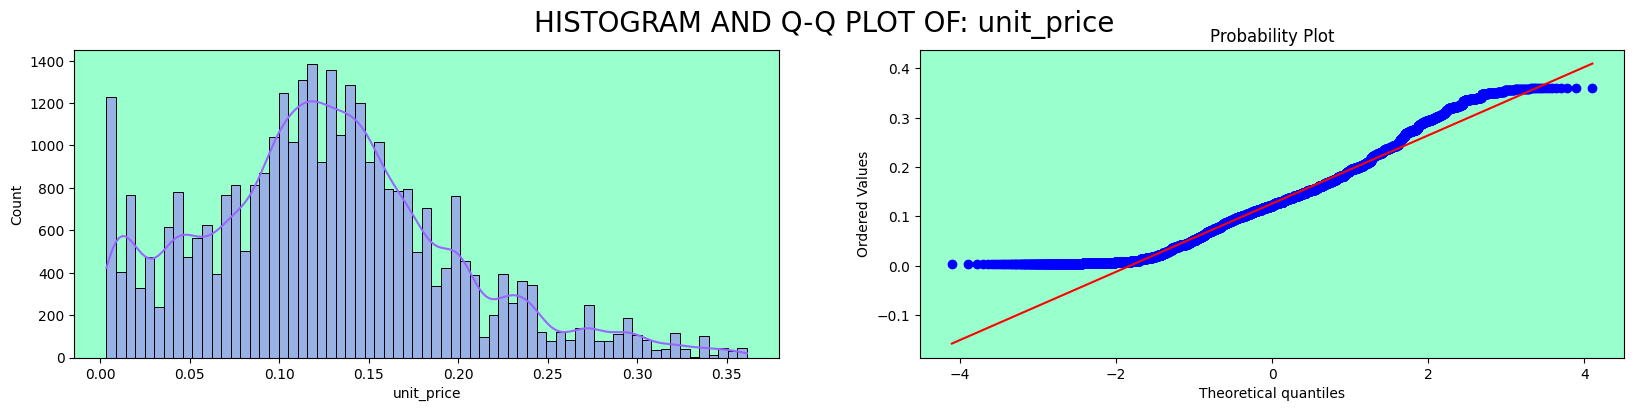

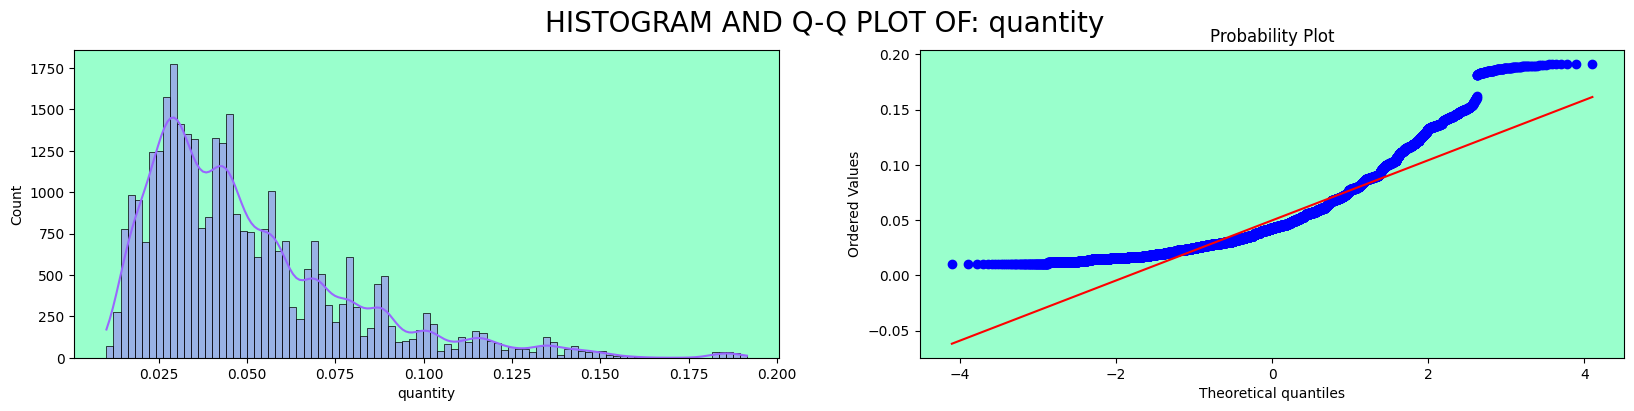

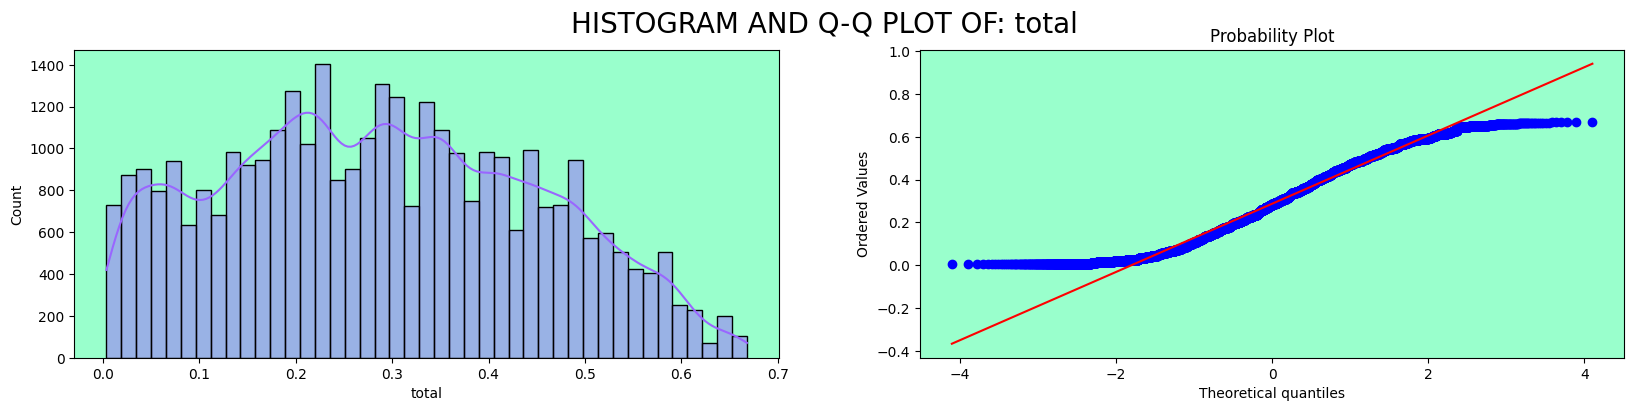

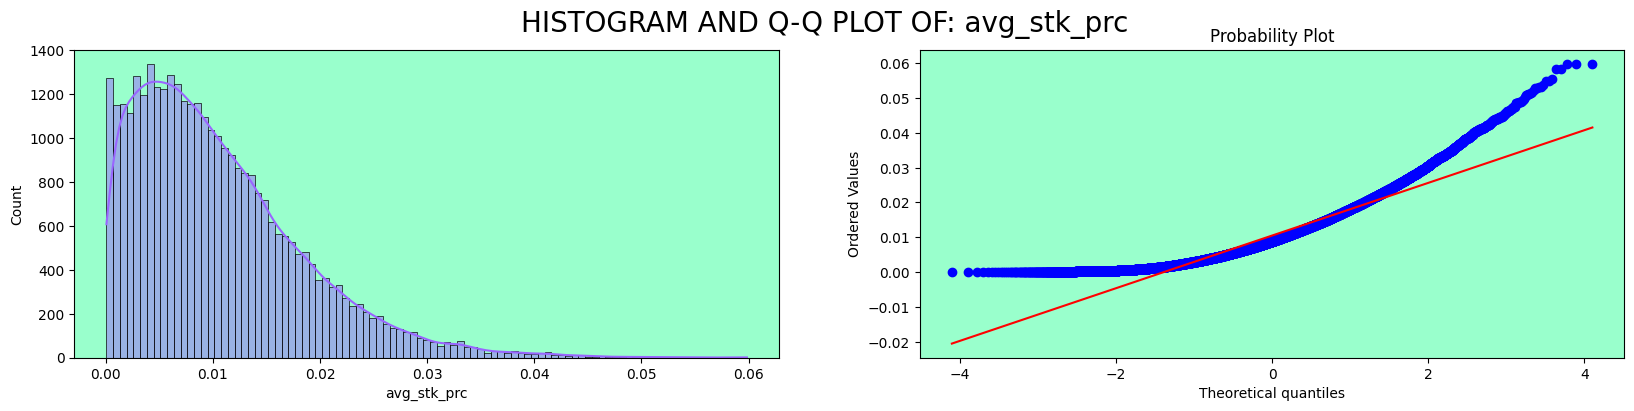

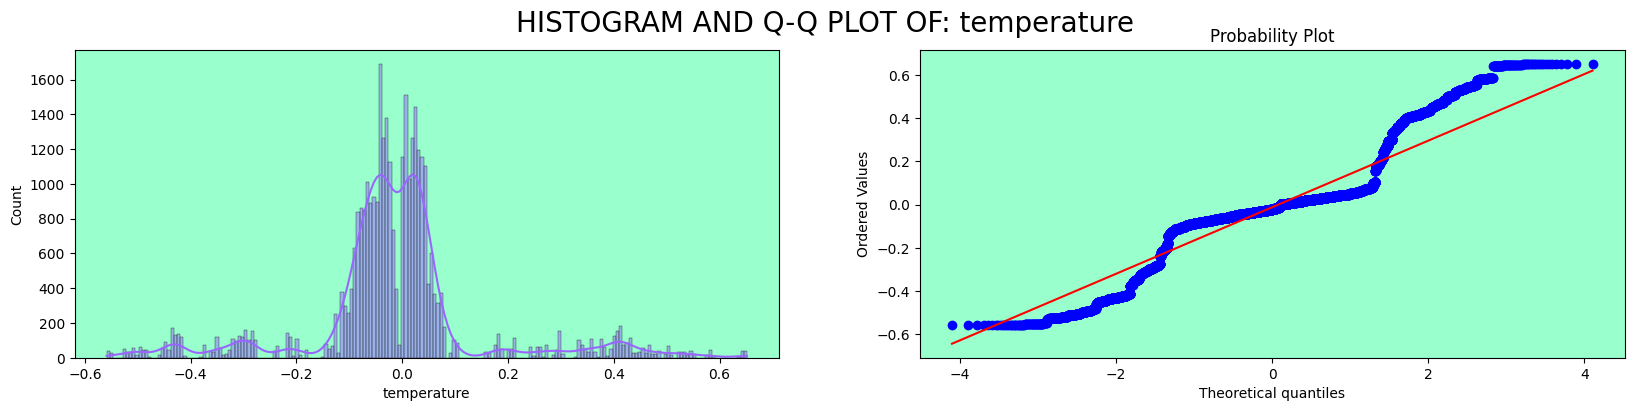

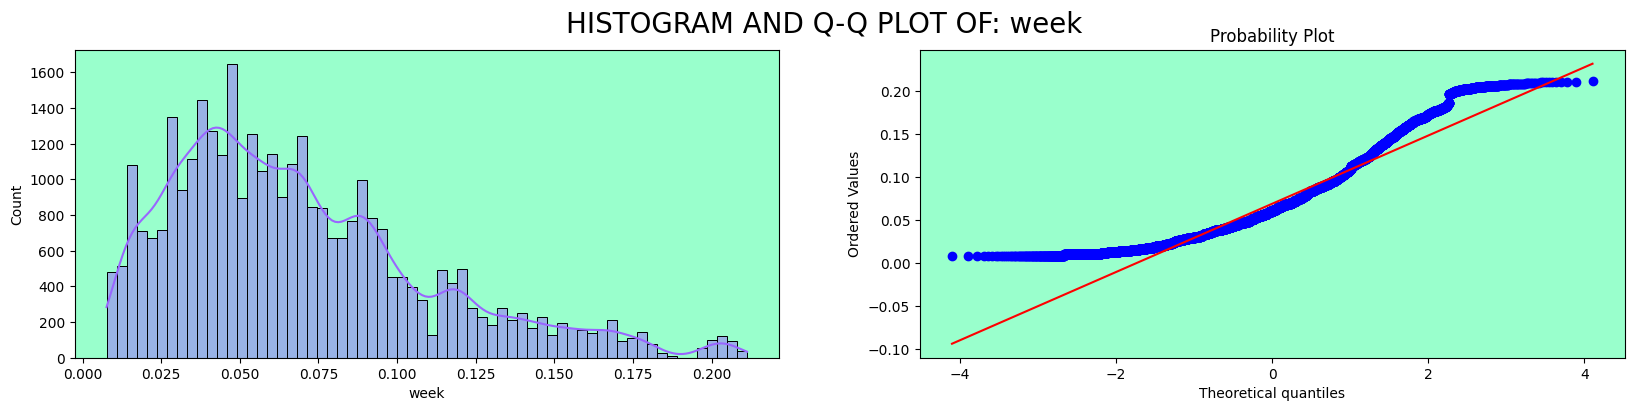

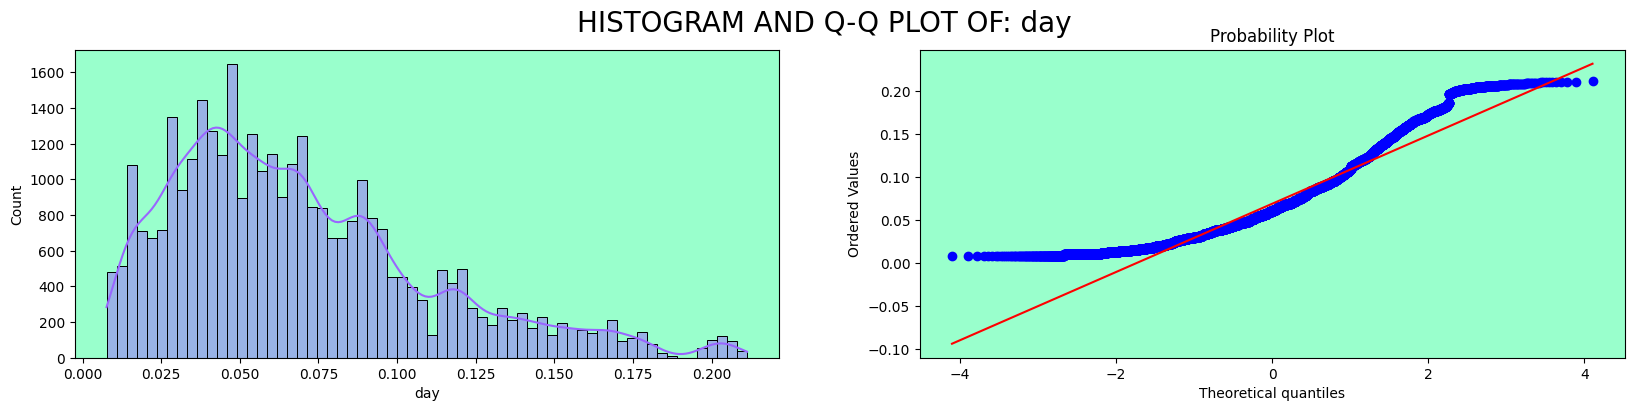

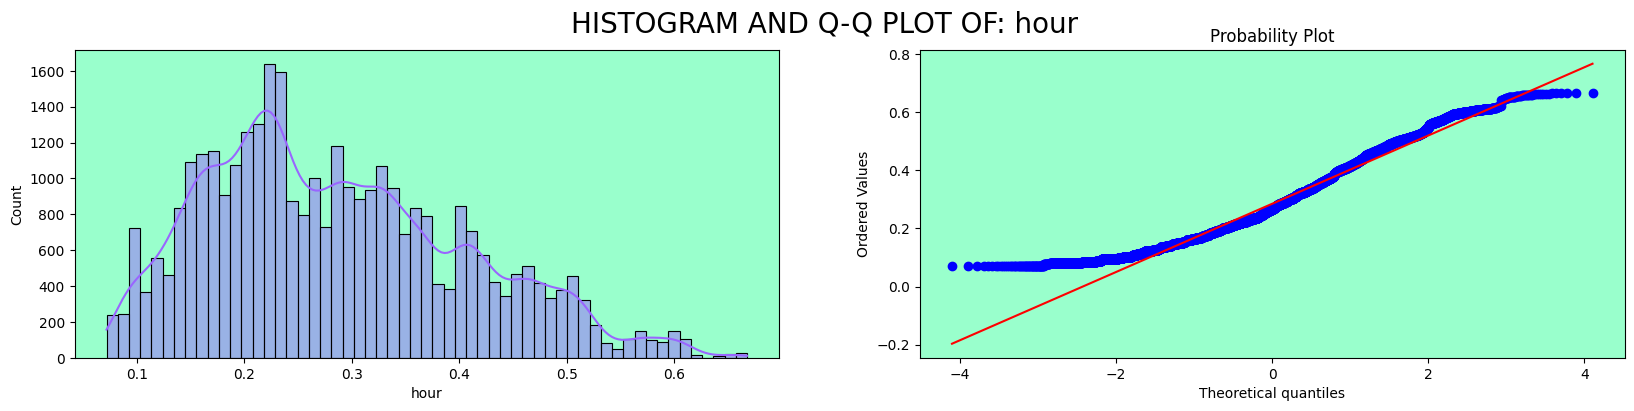

In [77]:
n=Normalizer(norm='l1',)
cdf[f]=n.fit_transform(cdf[f])

for i in f:
    histandbox(i,cdf)

In [78]:
cat=cdf.select_dtypes(include='object').columns
cat

Index(['category', 'customer_type', 'payment_type'], dtype='object')

In [79]:
for i in cat:
    print("**************************")
    print(f'Nuniques of :         {i}',cdf[i].nunique())
    print()
    print(cdf[i].value_counts().sort_values(ascending=False))
    

**************************
Nuniques of :         category 22

category
fruit                    6081
vegetables               4287
dairy                    2503
meat                     2066
canned foods             2016
refrigerated items       1873
packaged foods           1480
kitchen                  1372
seafood                  1305
cheese                   1195
baked goods              1165
baby products            1156
medicine                 1132
pets                     1001
beverages                 915
cleaning products         790
personal care             772
baking                    748
snacks                    710
frozen                    677
condiments and sauces     388
spices and herbs          292
Name: count, dtype: int64
**************************
Nuniques of :         customer_type 5

customer_type
non-member    7801
premium       7273
gold          7046
basic         6000
standard      5804
Name: count, dtype: int64
**************************
Nuniques of :  

# **CATEGORICAL FEATURES ENCODING: LABELENCODER & ONEHOTENCODER**

In [80]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
cdf['category']=le.fit_transform(cdf['category'])


In [81]:
for i in ['customer_type','payment_type']:
    cdf[i]=cdf[i].astype('category')

In [82]:
cdf=pd.get_dummies(cdf,columns=['customer_type','payment_type'])
cdf

,category,unit_price,quantity,total,avg_stk_prc,temperature,week,day,hour,customer_type_basic,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard,payment_type_cash,payment_type_credit card,payment_type_debit card,payment_type_e-wallet
69,10,0.057057,0.057200,0.228228,0.003575,0.425139,0.014300,0.014300,0.200200,False,False,False,True,False,False,False,False,True
70,10,0.057073,0.057216,0.228294,0.003290,0.425261,0.014304,0.014304,0.200257,False,False,False,True,False,False,False,False,True
71,10,0.056612,0.056754,0.226447,0.011351,0.421822,0.014188,0.014188,0.198638,False,False,False,True,False,False,False,False,True
72,10,0.056620,0.056762,0.226479,0.011210,0.421882,0.014190,0.014190,0.198666,False,False,False,True,False,False,False,False,True
73,10,0.056564,0.056705,0.226255,0.012192,0.421463,0.014176,0.014176,0.198469,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38891,6,0.224350,0.026410,0.448699,0.004490,-0.031956,0.052819,0.052819,0.158458,False,False,False,True,False,True,False,False,False
38892,6,0.224379,0.026413,0.448759,0.004358,-0.031960,0.052826,0.052826,0.158479,False,False,False,True,False,True,False,False,False
38893,6,0.224320,0.026406,0.448640,0.004621,-0.031951,0.052812,0.052812,0.158437,False,False,False,True,False,True,False,False,False
38894,6,0.224587,0.026438,0.449174,0.003437,-0.031989,0.052875,0.052875,0.158625,False,False,False,True,False,True,False,False,False


In [83]:
cdf.columns

Index(['category', 'unit_price', 'quantity', 'total', 'avg_stk_prc',
       'temperature', 'week', 'day', 'hour', 'customer_type_basic',
       'customer_type_gold', 'customer_type_non-member',
       'customer_type_premium', 'customer_type_standard', 'payment_type_cash',
       'payment_type_credit card', 'payment_type_debit card',
       'payment_type_e-wallet'],
      dtype='object')

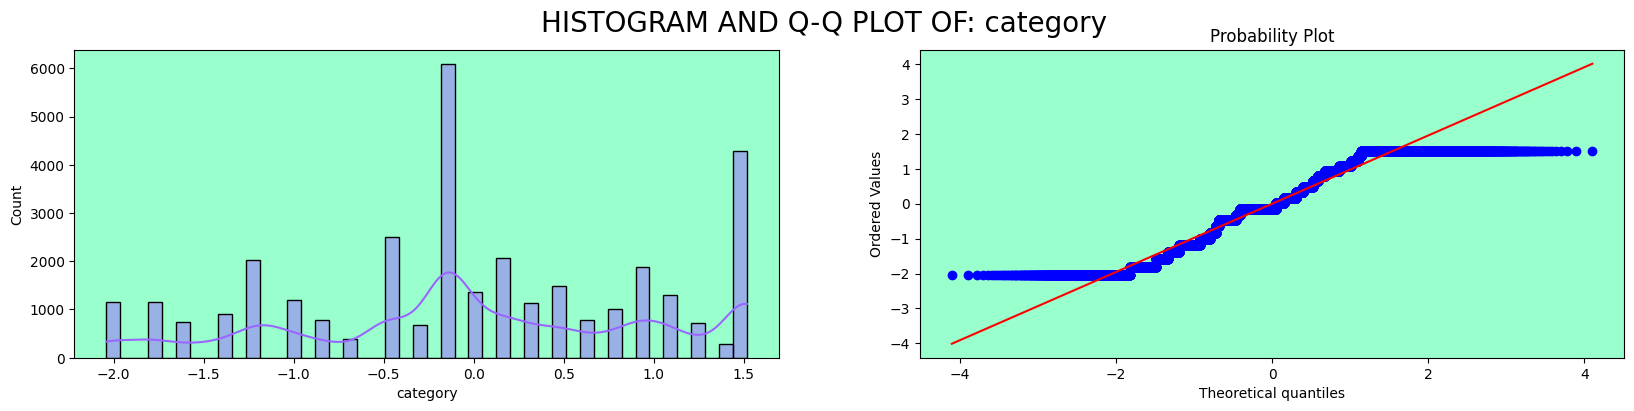

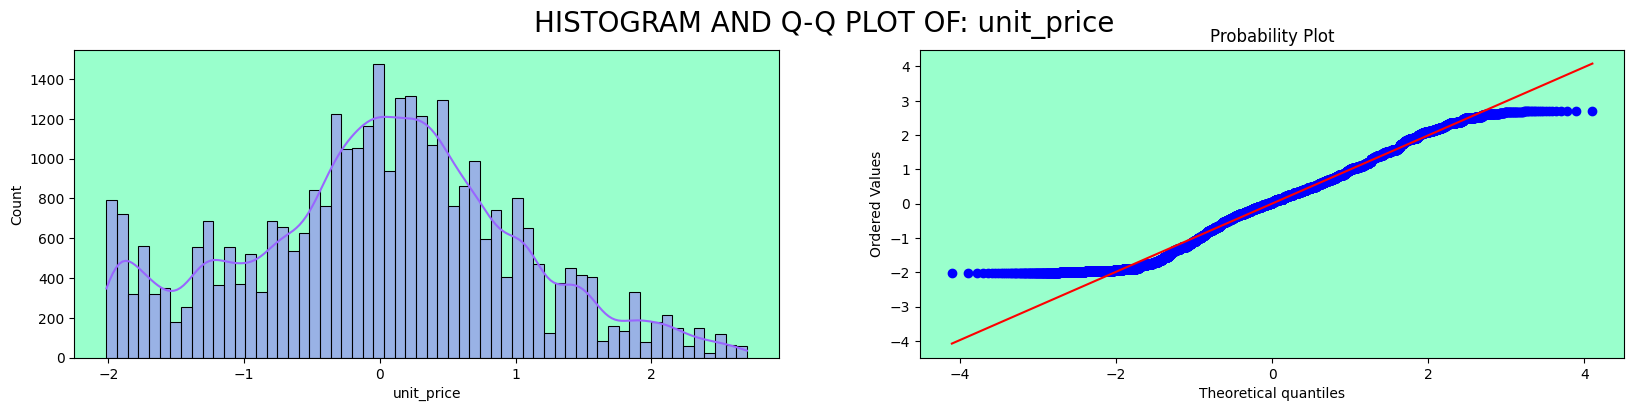

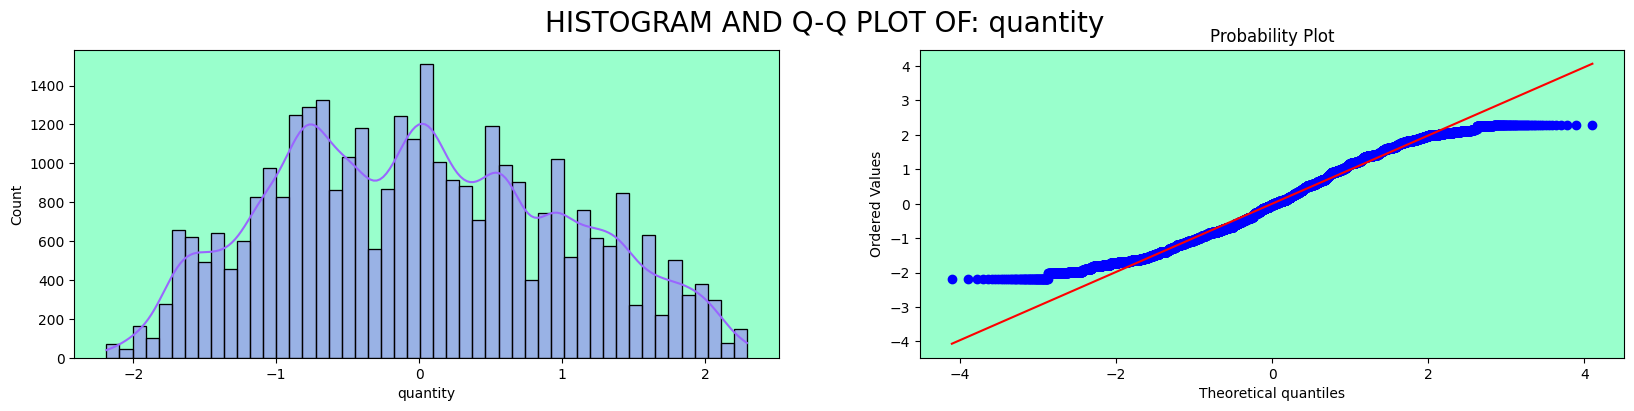

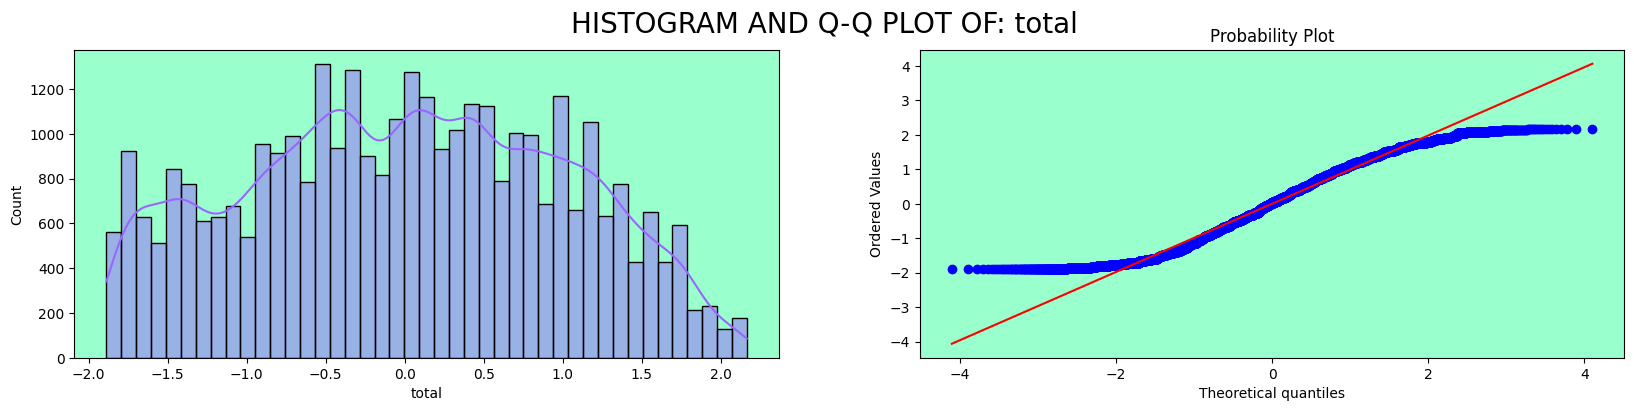

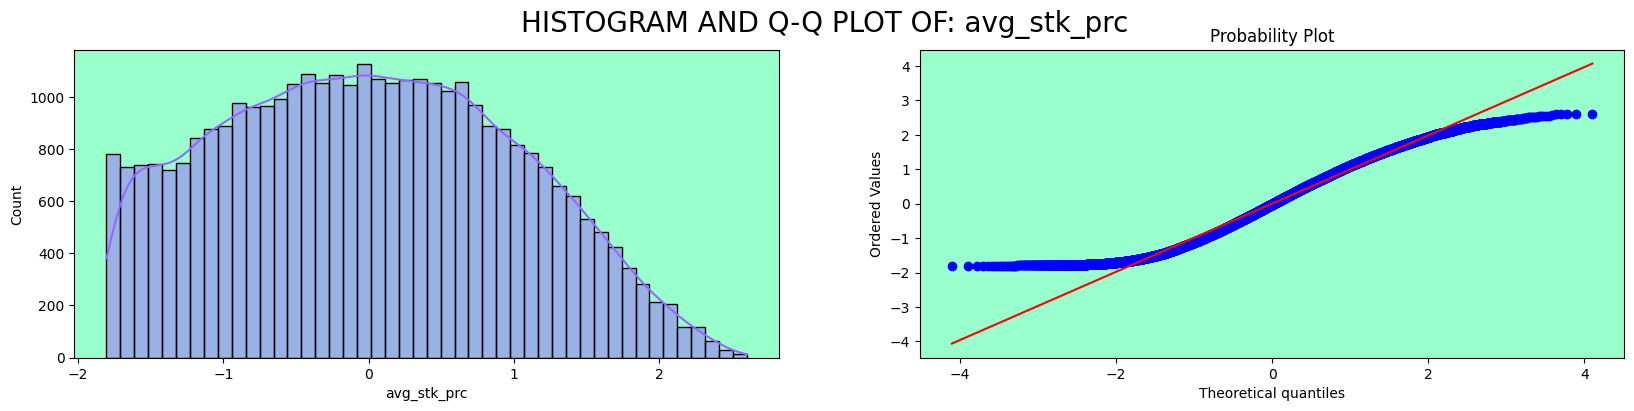

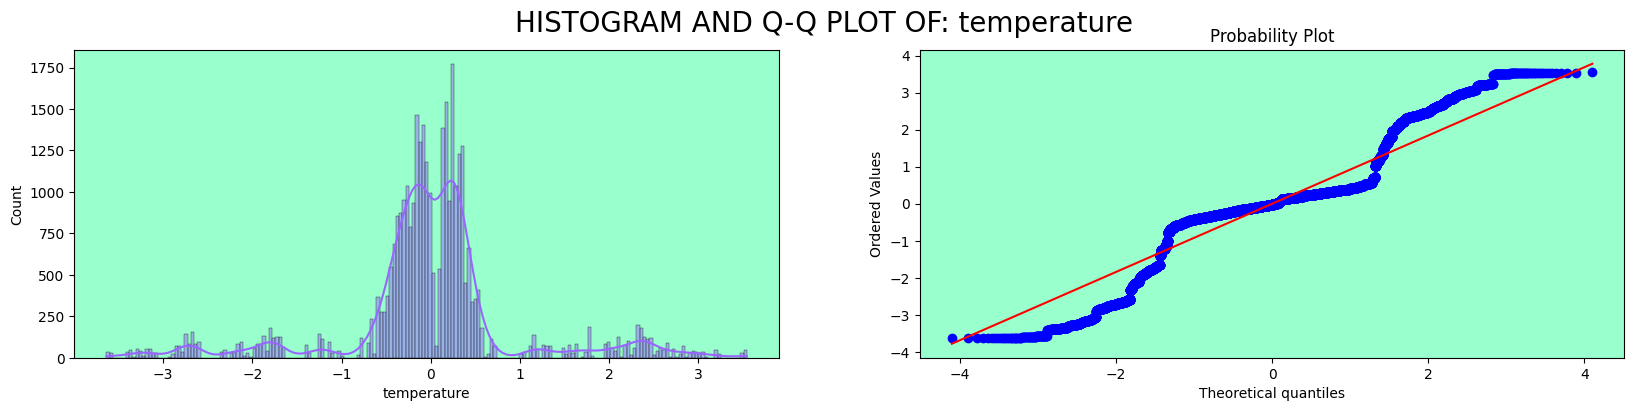

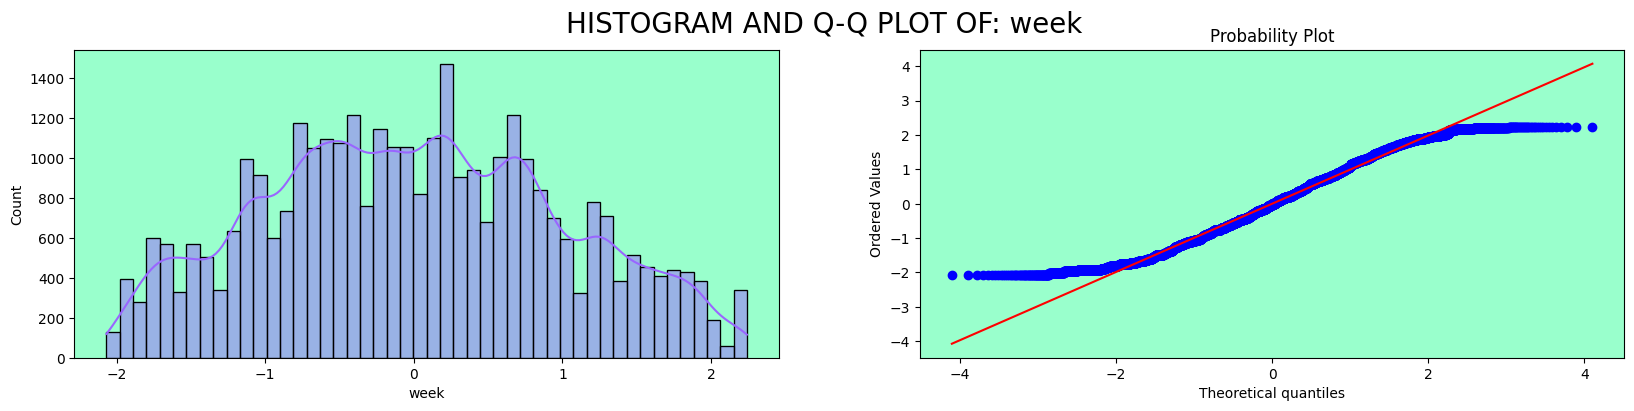

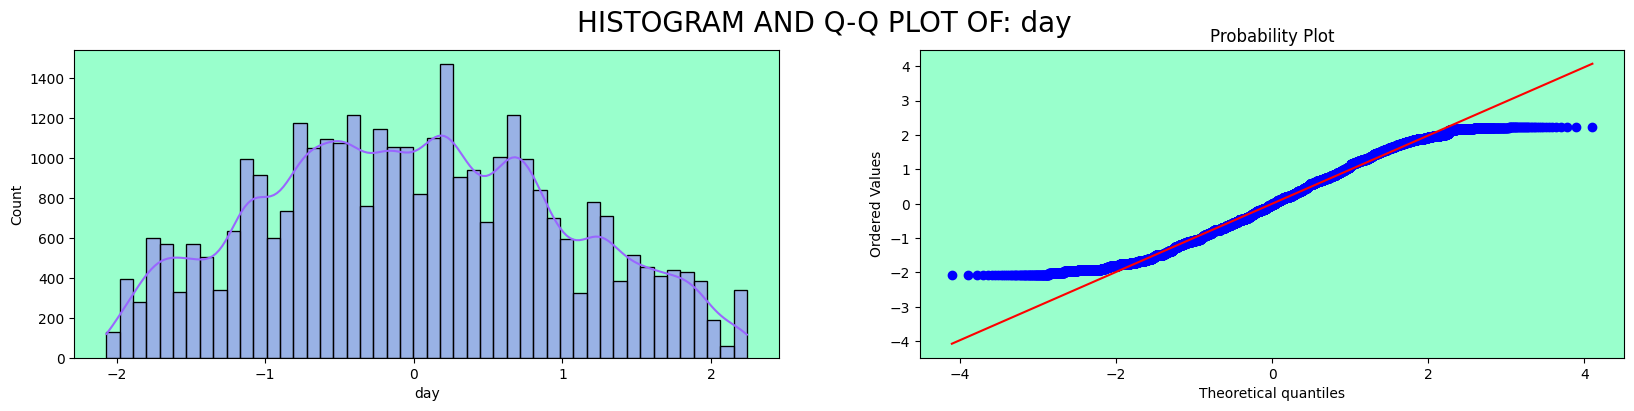

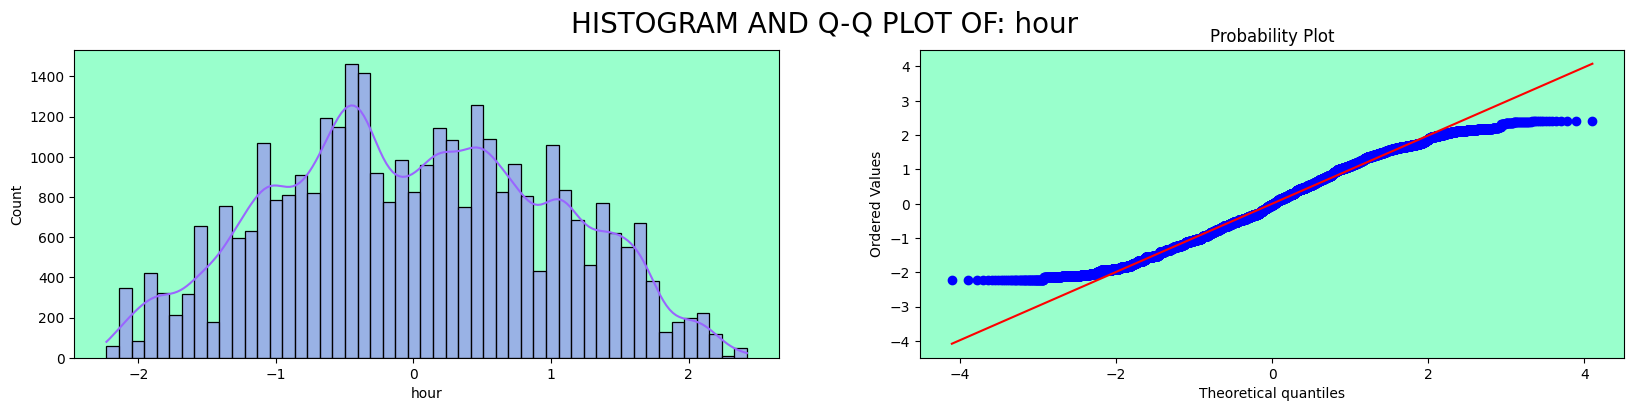

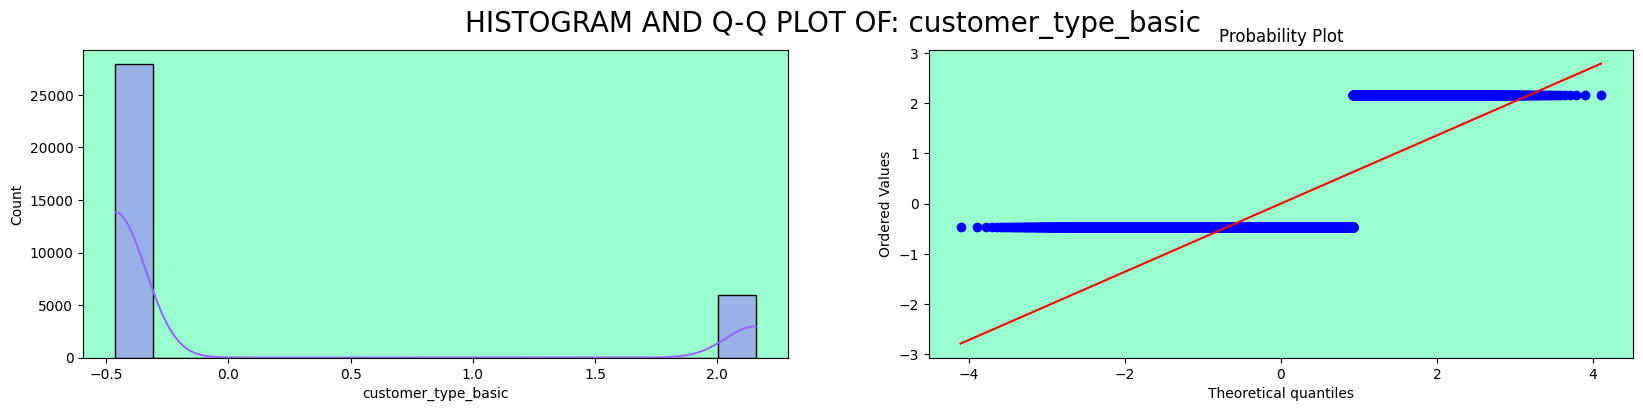

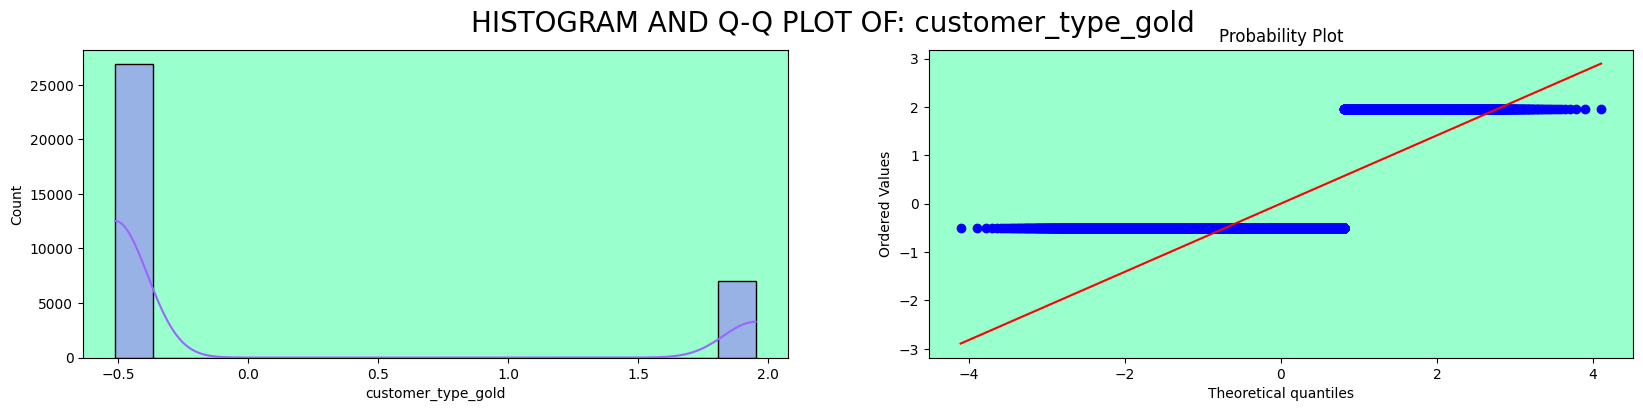

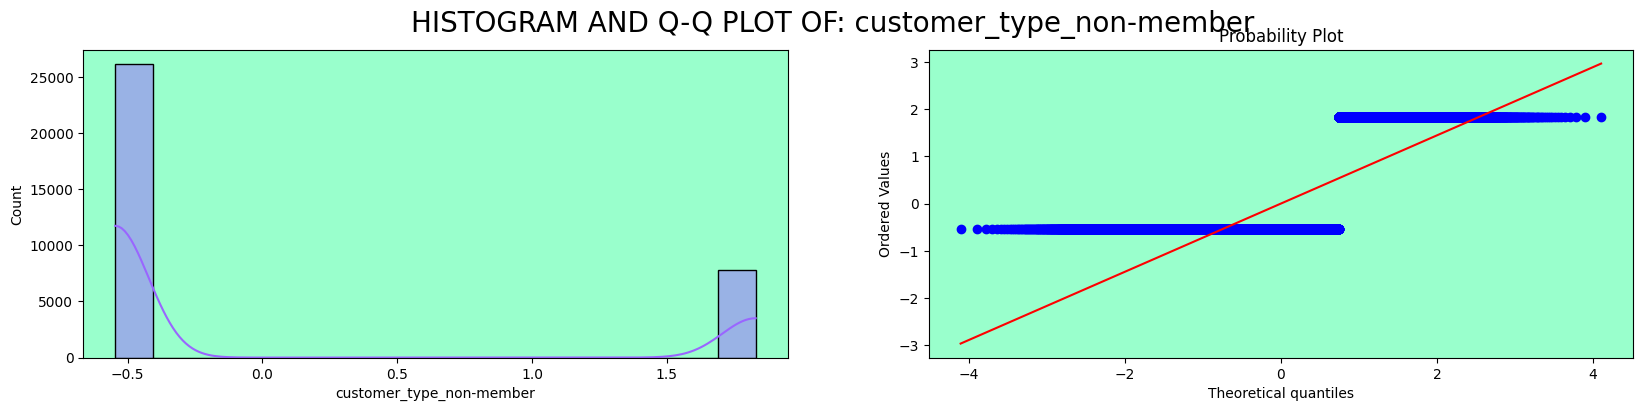

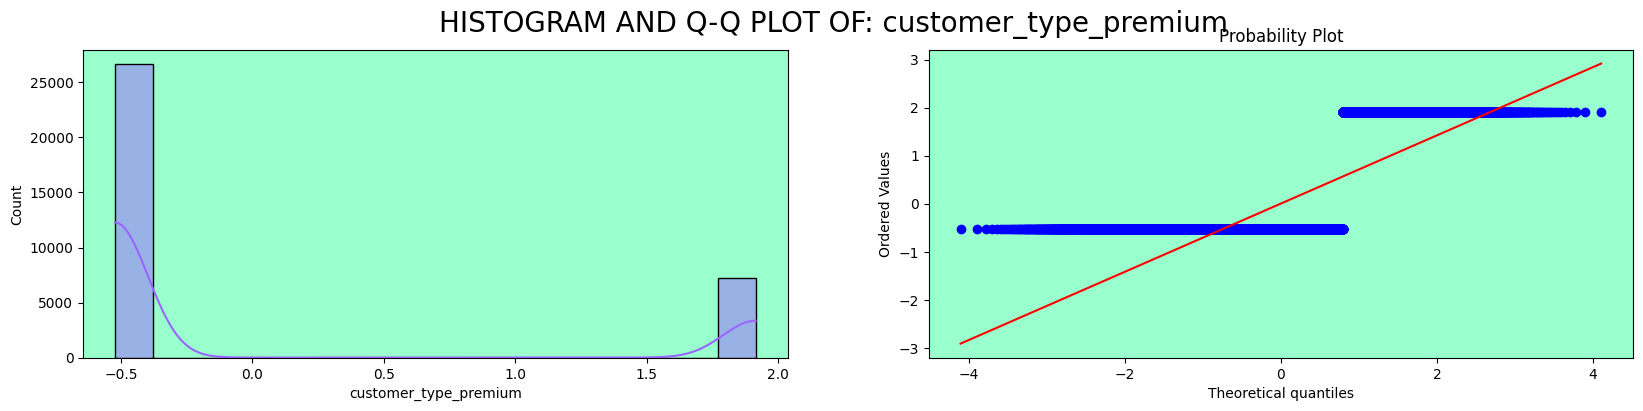

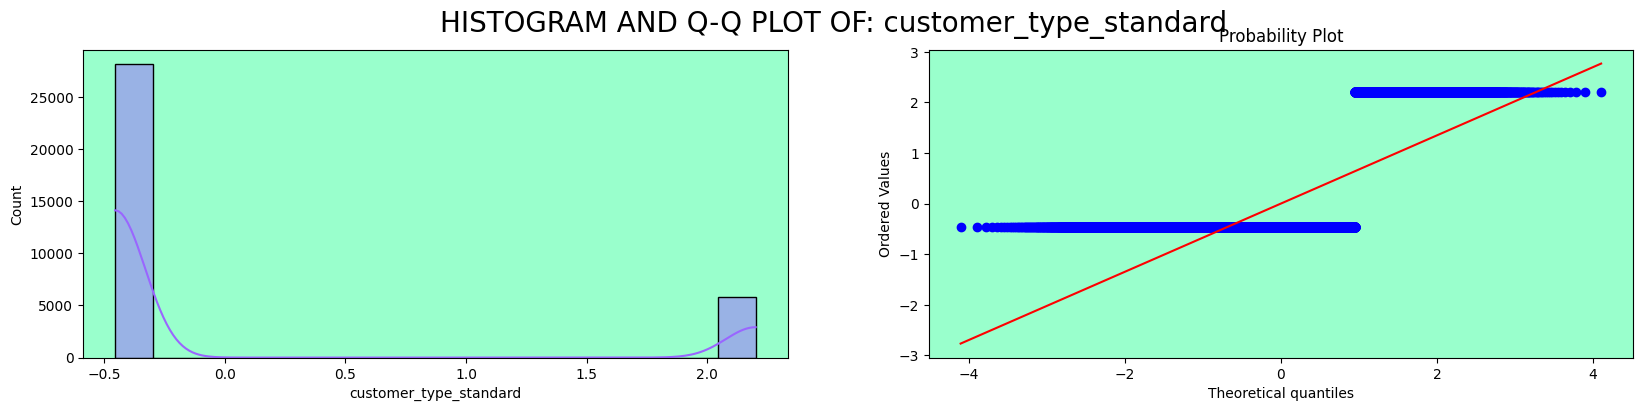

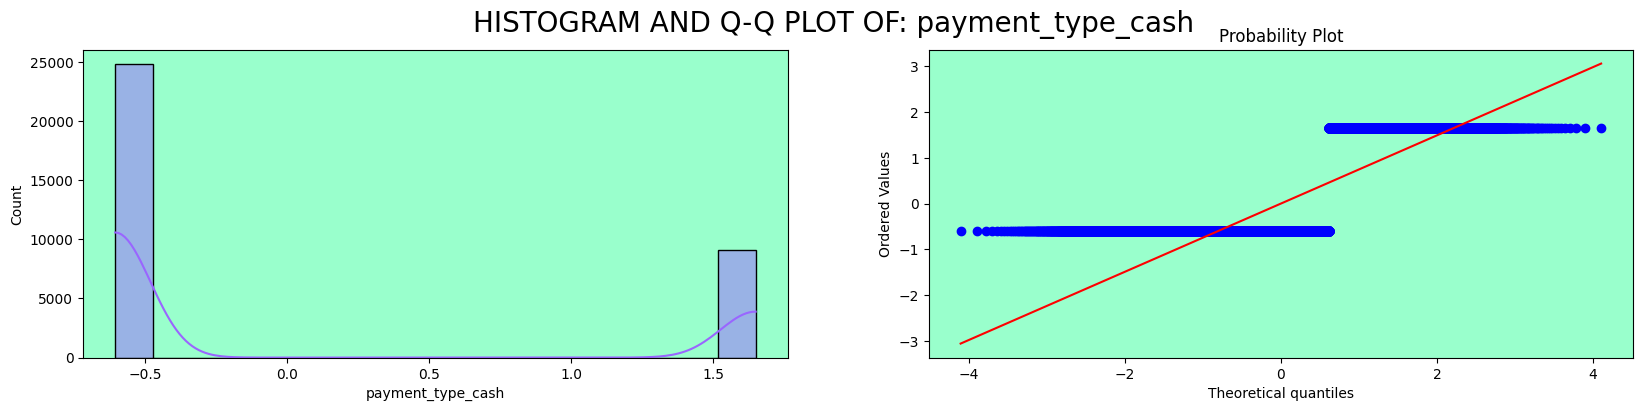

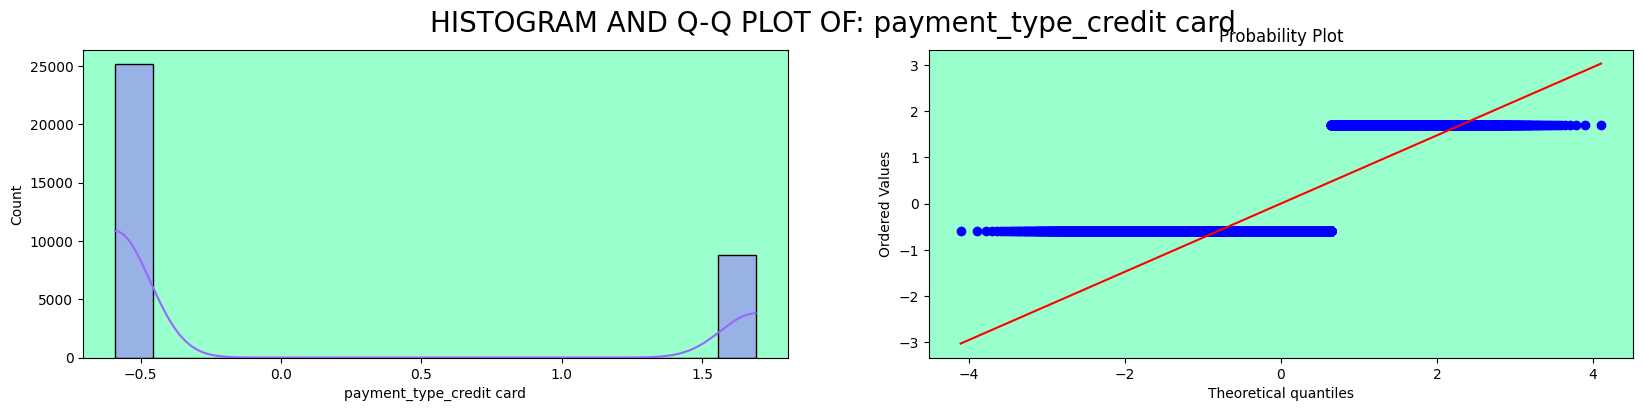

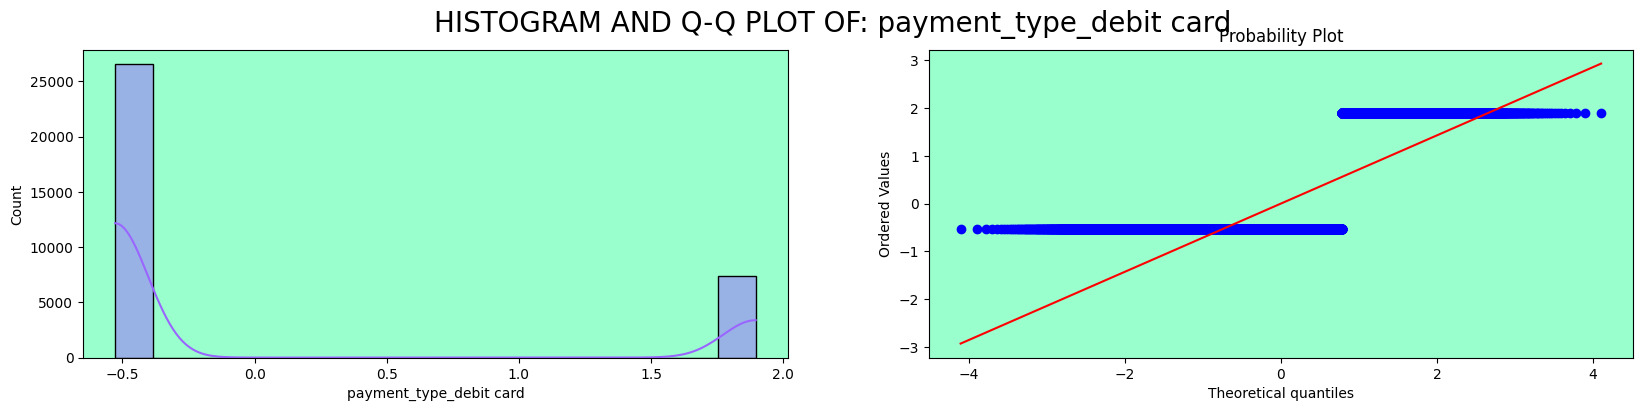

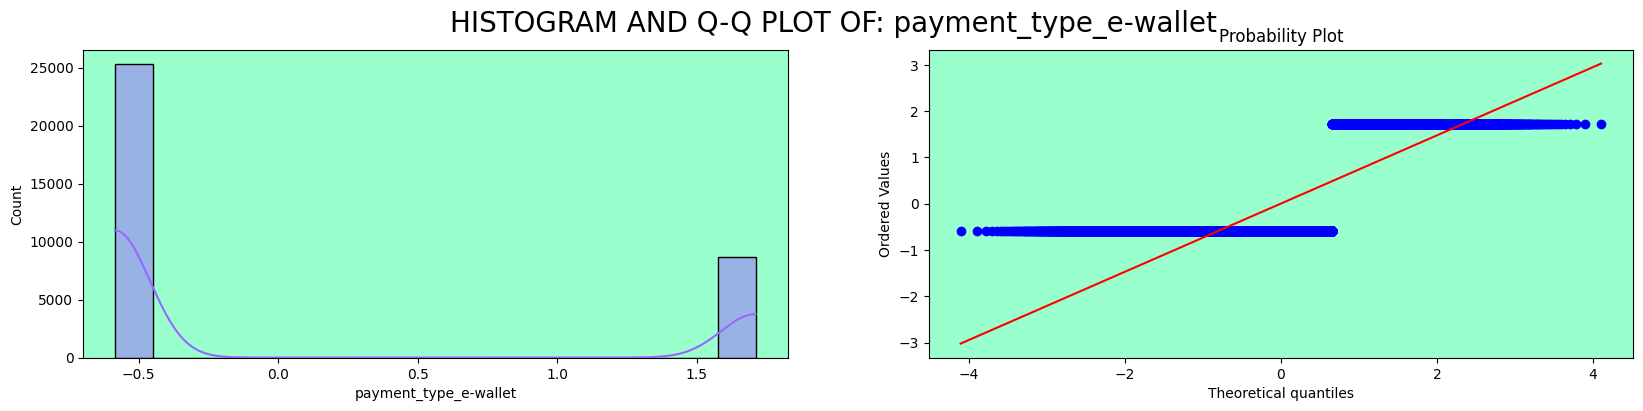

In [84]:
cols=['category', 'unit_price', 'quantity', 'total', 'avg_stk_prc',
       'temperature', 'week', 'day', 'hour', 'customer_type_basic',
       'customer_type_gold', 'customer_type_non-member',
       'customer_type_premium', 'customer_type_standard', 'payment_type_cash',
       'payment_type_credit card', 'payment_type_debit card',
       'payment_type_e-wallet']
ss=PowerTransformer()
cdf[cols]=ss.fit_transform(cdf[cols])

for i in cols:
    histandbox(i,cdf)

In [85]:
cc=['customer_type_basic',
       'customer_type_gold', 'customer_type_non-member',
       'customer_type_premium', 'customer_type_standard', 'payment_type_cash',
       'payment_type_credit card', 'payment_type_debit card',
       'payment_type_e-wallet']
for i in cc:
    cdf[cc]=cdf[cc].astype('category')

In [86]:
cdf[cc].info()

<class 'pandas.core.frame.DataFrame'>
Index: 33924 entries, 69 to 38895
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_type_basic       33924 non-null  category
 1   customer_type_gold        33924 non-null  category
 2   customer_type_non-member  33924 non-null  category
 3   customer_type_premium     33924 non-null  category
 4   customer_type_standard    33924 non-null  category
 5   payment_type_cash         33924 non-null  category
 6   payment_type_credit card  33924 non-null  category
 7   payment_type_debit card   33924 non-null  category
 8   payment_type_e-wallet     33924 non-null  category
dtypes: category(9)
memory usage: 564.3 KB


# **FEATURE IMPORTANCE: MUTUAL INFORMATION & F-STATISTIC for  REGRESSION**

In [87]:
y=cdf.avg_stk_prc
x=cdf.drop(columns='avg_stk_prc')

In [229]:
from sklearn.feature_selection import mutual_info_regression
d=['cus_gold', 'cus_non-member',
       'cus_premium', 'cus_standard', 'pymode_credit card',
       'pymode_debit card', 'pymode_e-wallet']
mi=mutual_info_regression(x,y,discrete_features='auto')

In [230]:
miscores=mi.tolist()
ms=pd.DataFrame({'features':x.columns,'MutualInformation Scores':miscores})
ms

,features,MutualInformation Scores
0,category,0.338898
1,unit_price,0.528565
2,quantity,0.693032
3,total,0.523817
4,temperature,0.448207
5,week,0.615157
6,day,0.615265
7,hour,0.591473
8,customer_type_basic,0.061260
9,customer_type_gold,0.068757


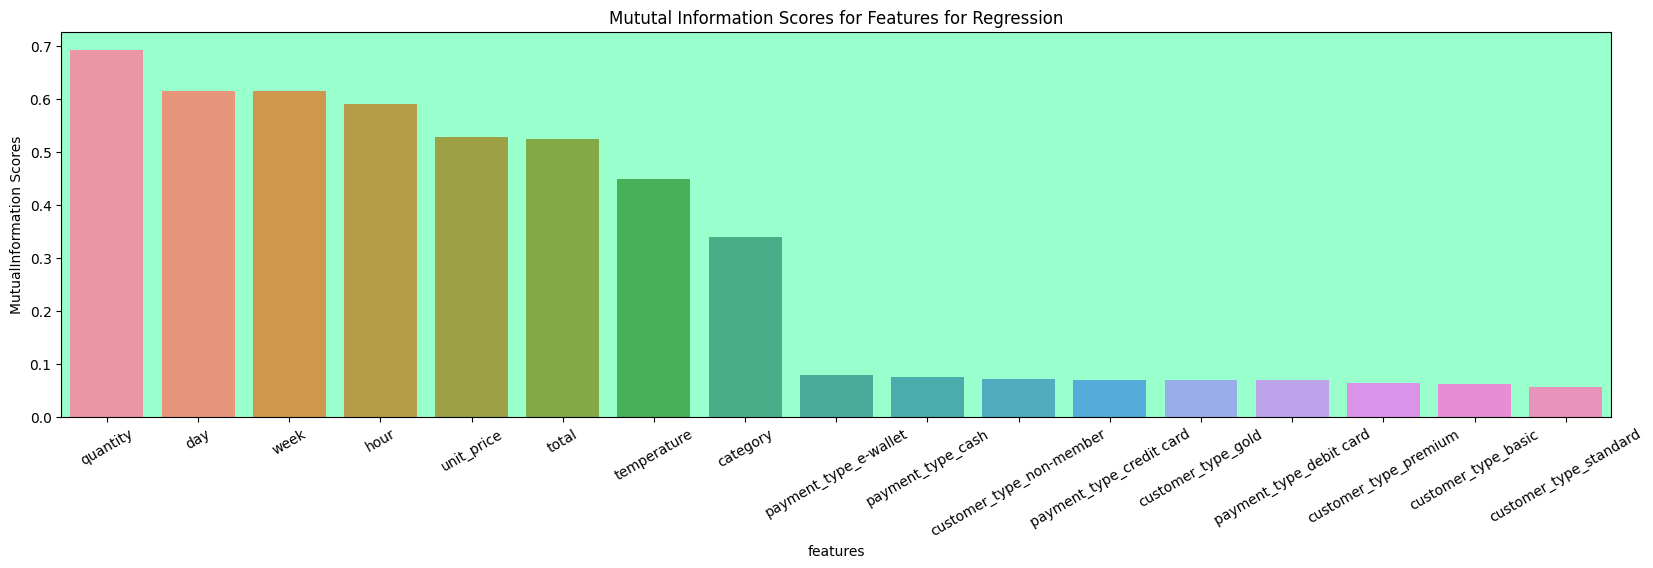

In [231]:
ms=ms.sort_values(by='MutualInformation Scores',ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(data=ms,x='features',y='MutualInformation Scores')
plt.xticks(rotation=30)
plt.title('Mututal Information Scores for Features for Regression')
plt.show()

In [232]:
from sklearn.feature_selection import f_regression
f,p=f_regression(x,y)
anova=pd.DataFrame({'Feature':x.columns,
                   'F-Statistic':f,
                   'P value':p})
anova=anova.sort_values(by='F-Statistic',ascending=False)
anova.round(2)

,Feature,F-Statistic,P value
7,hour,7653.04,0.00
3,total,5970.87,0.00
5,week,1915.42,0.00
6,day,1915.42,0.00
1,unit_price,1649.66,0.00
2,quantity,1620.00,0.00
0,category,196.28,0.00
4,temperature,30.03,0.00
12,customer_type_standard,19.75,0.00
14,payment_type_credit card,19.55,0.00


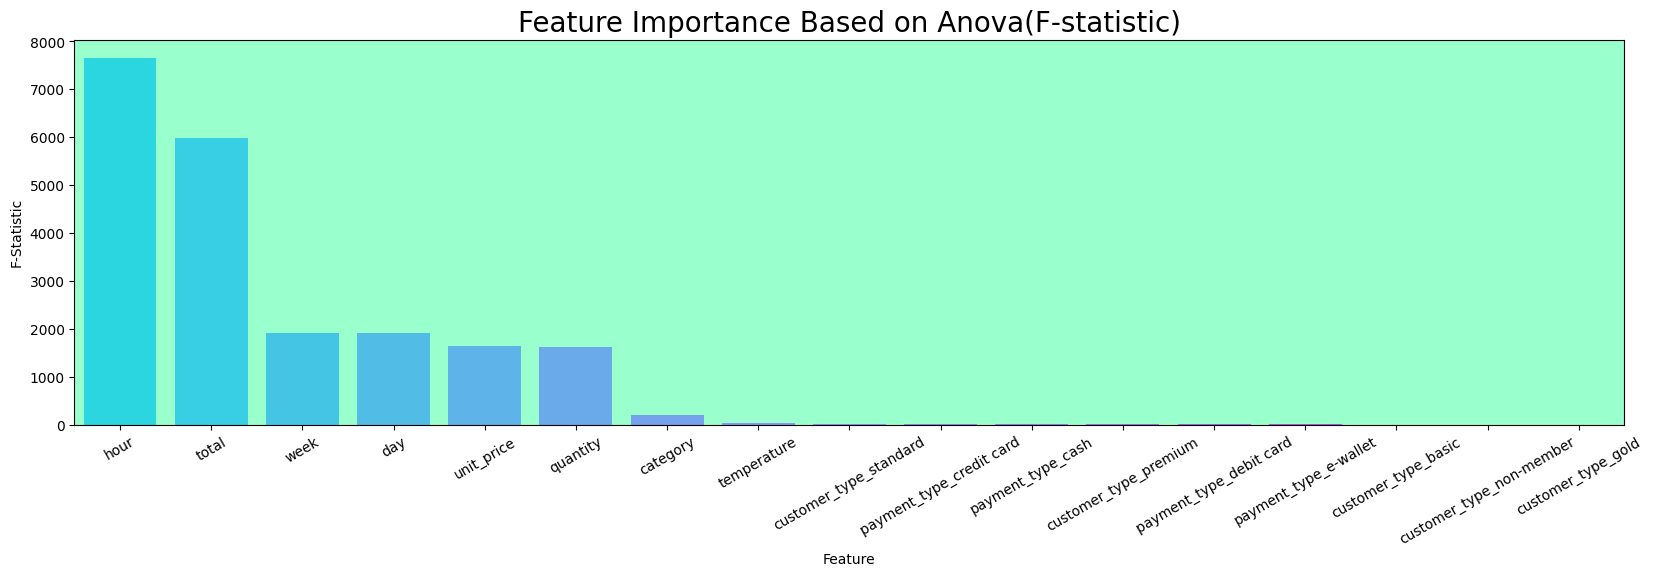

In [233]:
plt.figure(figsize=(20,5))
sns.barplot(data=anova,x='Feature',y='F-Statistic',palette='cool')
plt.xticks(rotation=30)
plt.title('Feature Importance Based on Anova(F-statistic)',fontsize=20)
plt.show()

# **TRAIN-TEST SPLIT**

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,shuffle=True,train_size=.80)
print(f"xtrain: {xtrain.shape} and xtest: {xtest.shape}")
print(f"ytrain: {ytrain.shape} and ytest: {ytest.shape}")

xtrain: (27139, 17) and xtest: (6785, 17)
ytrain: (27139,) and ytest: (6785,)


# **PREDICTIVE MODEL BUILDING AND VALIDATION**

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,median_absolute_error
from sklearn.model_selection import KFold,cross_val_score,RepeatedKFold
from sklearn.linear_model import LinearRegression
import pickle as pk

In [237]:
from sklearn.model_selection import RandomizedSearchCV

In [238]:
def p(g,model,name):
    print(model)
    print('')
    pt=RandomizedSearchCV(estimator=model,param_distributions=g,n_jobs=-1,cv=7,random_state=344)
    pt.fit(xtrain,ytrain)
    print('Best Parameters',pt.best_params_)
    print('Best Score',round(pt.best_score_*100,2),"%")
    print('')
    best=pt.best_estimator_
    
    best.fit(xtrain,ytrain)
    ypred=best.predict(xtest)
    
    pk.dump(best, open(f'"{name}.pkl"', 'wb'))
    
    #Dataframe
    b={'Metric_Name':['R.sq(%)','Mean-Squared-Error','Rooted-Mean-Squared-Error','Mean-Absoulute-Error','Median-Absoulte-Error'],
      'Values':[round(r2_score(ytest,ypred)*100,2),round(mean_squared_error(ytest,ypred),3),
                round(np.sqrt(mean_absolute_error(ytest,ypred)),3),round(mean_absolute_error(ytest,ypred),3),
                round(median_absolute_error(ytest,ypred),3)]}
    
    d=pd.DataFrame(b)
    return d
    

# *LINEAR REGRESSION*

In [47]:
lr=LinearRegression(n_jobs=-1,)
g={'positive':[True,False],'fit_intercept':[True,False]
  }
p(g,lr,'linearreg')

LinearRegression(n_jobs=-1)

Best Parameters {'positive': False, 'fit_intercept': False}
Best Score 22.65 %



,Metric_Name,Values
0,R.sq(%),23.110
1,Mean-Squared-Error,0.757
2,Rooted-Mean-Squared-Error,0.850
3,Mean-Absoulute-Error,0.723
4,Median-Absoulte-Error,0.666


# *HIST-GRADIENT-BOOSTING-REGRESSOR*

In [48]:
from sklearn.ensemble import AdaBoostRegressor,HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')


In [49]:
h=HistGradientBoostingRegressor(random_state=34563,max_bins=244,max_depth=30)
g={'learning_rate':[0.1,0.01],
  'max_iter':[100,200,500,600,800,900],
  'max_leaf_nodes':[20,30],
 'l2_regularization':[1,0.01],'tol':[1e-7,1e-8]}
p(g,h,'histgrdbstreg')

HistGradientBoostingRegressor(max_bins=244, max_depth=30, random_state=34563)

Best Parameters {'tol': 1e-08, 'max_leaf_nodes': 30, 'max_iter': 800, 'learning_rate': 0.1, 'l2_regularization': 1}
Best Score 94.08 %



,Metric_Name,Values
0,R.sq(%),94.810
1,Mean-Squared-Error,0.051
2,Rooted-Mean-Squared-Error,0.408
3,Mean-Absoulute-Error,0.166
4,Median-Absoulte-Error,0.126


# *ADAPTIVE-BOOSTING-REGRESSOR*

In [50]:
ada=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=16))
grid={'n_estimators':[7,8,10],
         'learning_rate':[1.2,1.6,2],
         'loss':['linear', 'square', 'exponential']}
p(grid,ada,'adabstreg')

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=16))

Best Parameters {'n_estimators': 8, 'loss': 'linear', 'learning_rate': 1.6}
Best Score 97.39 %



,Metric_Name,Values
0,R.sq(%),96.790
1,Mean-Squared-Error,0.032
2,Rooted-Mean-Squared-Error,0.338
3,Mean-Absoulute-Error,0.114
4,Median-Absoulte-Error,0.069


# *BAGGINGREGRESSOR*

In [51]:
from sklearn.ensemble import BaggingRegressor

In [52]:
bag=BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=17),oob_score=False,n_jobs=-1)
bgrid={'n_estimators':[10,13,16]}
p(bgrid,bag,'bagreg')

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=17), n_jobs=-1)

Best Parameters {'n_estimators': 16}
Best Score 94.52 %



,Metric_Name,Values
0,R.sq(%),94.540
1,Mean-Squared-Error,0.054
2,Rooted-Mean-Squared-Error,0.384
3,Mean-Absoulute-Error,0.148
4,Median-Absoulte-Error,0.083


# *RANDOMFORESTREGESSOR*

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
r=RandomForestRegressor(n_jobs=-1,oob_score=True)
rgrid={'max_depth':[170,190,200,210], 
       'max_features':['sqrt', 'log2'],
       'max_samples':[30,100,150,200],
       'max_leaf_nodes':[20,40,60,100]}

p(rgrid,r,'randfrstreg')

RandomForestRegressor(n_jobs=-1, oob_score=True)

Best Parameters {'max_samples': 200, 'max_leaf_nodes': 40, 'max_features': 'log2', 'max_depth': 170}
Best Score 25.39 %



,Metric_Name,Values
0,R.sq(%),25.350
1,Mean-Squared-Error,0.735
2,Rooted-Mean-Squared-Error,0.844
3,Mean-Absoulute-Error,0.713
4,Median-Absoulte-Error,0.662


# *RADIUS NEIGHBOR REGRESSOR*

In [55]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [56]:
rnr=RadiusNeighborsRegressor(algorithm='auto',n_jobs=-1)
rng={'weights':['uniform', 'distance'],
    'p':[1,2], 'leaf_size':[30,40,50]}
p(rng,rnr,'Radiusneighreg') 

RadiusNeighborsRegressor(n_jobs=-1)

Best Parameters {'weights': 'distance', 'p': 1, 'leaf_size': 30}
Best Score 93.77 %



,Metric_Name,Values
0,R.sq(%),94.760
1,Mean-Squared-Error,0.052
2,Rooted-Mean-Squared-Error,0.362
3,Mean-Absoulute-Error,0.131
4,Median-Absoulte-Error,0.064


# *STOCHASTIC-GRADIENT-DESCENT-REGRESSOR*

In [57]:
from sklearn.linear_model import SGDRegressor

In [58]:
sgd=SGDRegressor()
sgdg={'penalty':['l2', 'l1', 'elasticnet', None],
     'max_iter':[100,400,800], 'tol':[1e-3,1e-5,1e-8],'alpha':[0.1,.001,0.0001,1],'learning_rate':['constant','optimal','invscaling','adaptive']
     }
p(sgdg,sgd,'sgdreg')

SGDRegressor()

Best Parameters {'tol': 0.001, 'penalty': 'l1', 'max_iter': 100, 'learning_rate': 'adaptive', 'alpha': 0.0001}
Best Score 22.65 %



,Metric_Name,Values
0,R.sq(%),23.110
1,Mean-Squared-Error,0.757
2,Rooted-Mean-Squared-Error,0.850
3,Mean-Absoulute-Error,0.723
4,Median-Absoulte-Error,0.666


# *ARTIFICIAL NEURAL NETWORK MODEL-MULTIPLE LINEAR REGRESSION PROBLEM**

In [98]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from keras.optimizers import SGD,Adam

In [99]:
regNN=tf.keras.Sequential([Dense(units=256,input_dim=xtrain.shape[1],activation='relu',name='l1'),
                           Dense(units=128,activation='relu',name='l2'),
                           Dense(units=64,activation='relu',name='l3'),
                           Dense(units=32,activation='relu',name='l4'),
                           Dense(units=16,activation='relu',name='l5'),
                           Dense(units=8,activation='relu',name='l6'),#2
                           Dense(units=4,activation='relu',name='l7'),
                           Dense(units=1,activation='linear',name='l8')
                          ])

In [100]:
ms=tf.keras.losses.MeanSquaredError()
sgd=tf.keras.optimizers.SGD(learning_rate=0.001,nesterov=True,momentum=0.001,ema_momentum=1)#epsilon=1e-03
regNN.compile(optimizer=sgd,loss=ms,metrics=['mean_absolute_error', 'mean_squared_error'],)

In [101]:
regNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 256)               4608      
                                                                 
 l2 (Dense)                  (None, 128)               32896     
                                                                 
 l3 (Dense)                  (None, 64)                8256      
                                                                 
 l4 (Dense)                  (None, 32)                2080      
                                                                 
 l5 (Dense)                  (None, 16)                528       
                                                                 
 l6 (Dense)                  (None, 8)                 136       
                                                                 
 l7 (Dense)                  (None, 4)                

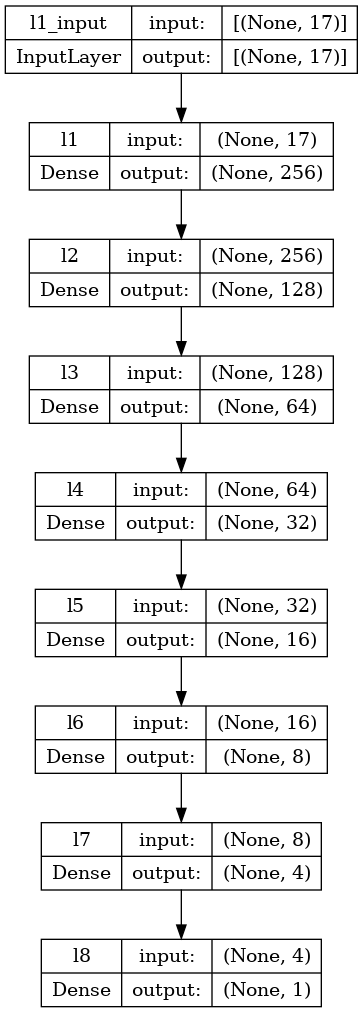

In [102]:
from tensorflow.keras.utils import plot_model
plot_model(regNN,show_shapes=True,to_file='regNN.png')

In [103]:
history=regNN.fit(xtrain,ytrain,shuffle=True,epochs=350,validation_split=.2,steps_per_epoch=250)
his=history.history

Epoch 1/350
250/250 [==============================] - 2s 5ms/step - loss: 0.9670 - mean_absolute_error: 0.8262 - mean_squared_error: 0.9670 - val_loss: 0.9567 - val_mean_absolute_error: 0.8247 - val_mean_squared_error: 0.9567
Epoch 2/350
250/250 [==============================] - 1s 4ms/step - loss: 0.9177 - mean_absolute_error: 0.8041 - mean_squared_error: 0.9177 - val_loss: 0.9176 - val_mean_absolute_error: 0.8065 - val_mean_squared_error: 0.9176
Epoch 3/350
250/250 [==============================] - 1s 3ms/step - loss: 0.8843 - mean_absolute_error: 0.7879 - mean_squared_error: 0.8843 - val_loss: 0.8887 - val_mean_absolute_error: 0.7919 - val_mean_squared_error: 0.8887
Epoch 4/350
250/250 [==============================] - 1s 4ms/step - loss: 0.8601 - mean_absolute_error: 0.7755 - mean_squared_error: 0.8601 - val_loss: 0.8689 - val_mean_absolute_error: 0.7826 - val_mean_squared_error: 0.8689
Epoch 5/350
250/250 [==============================] - 1s 3ms/step - loss: 0.8418 - mean_abs

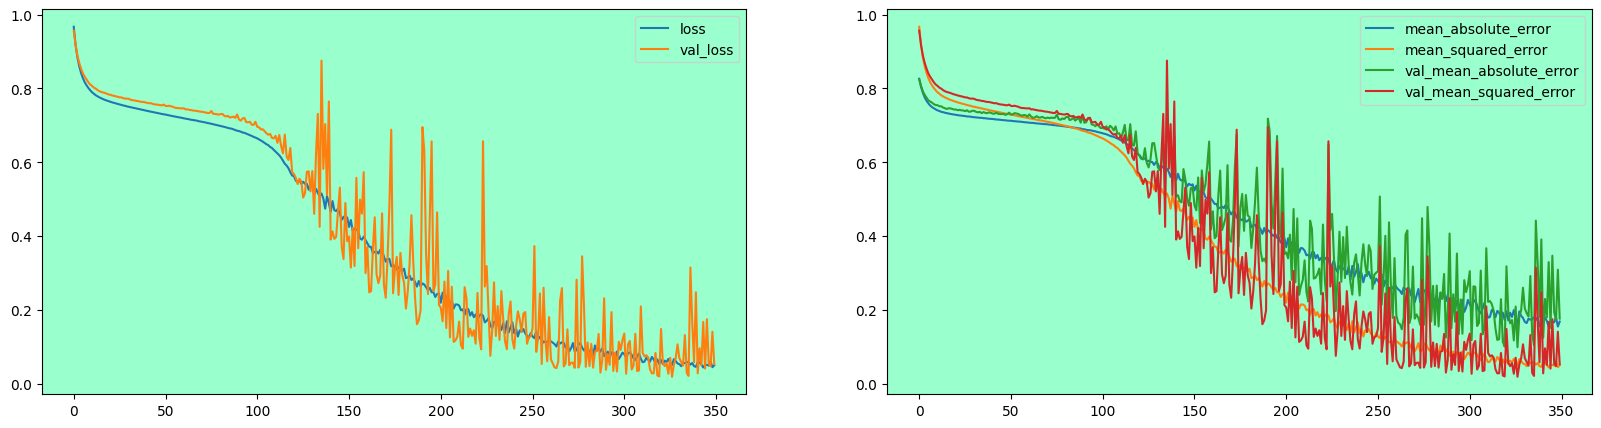

In [104]:
fig,axs=plt.subplots(1,2,figsize=(20,5))

axs[0].plot(his['loss'])
axs[0].plot(his['val_loss'])
axs[0].legend(['loss','val_loss'])


axs[1].plot(his['mean_absolute_error'])
axs[1].plot(his['mean_squared_error'])
axs[1].plot(his['val_mean_absolute_error'])
axs[1].plot(his['val_mean_squared_error'])
axs[1].legend(['mean_absolute_error','mean_squared_error','val_mean_absolute_error','val_mean_squared_error'])

In [105]:
ypred=regNN.predict(xtest)
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"MAE: {mean_absolute_error(ytest,ypred)}")
print(f"R^2: {round(r2_score(ytest,ypred)*100,2)}%")

213/213 [==============================] - 0s 1ms/step
MSE: 0.05225817538849632
MAE: 0.1759325793284671
R^2: 94.75%


In [48]:
regNN.save('regNN.h5')

# *GAMMA REGRESSOR*

In [187]:
from sklearn.linear_model import ARDRegression

In [190]:
a=ARDRegression()
gg={'alpha_1':[1e-3,1e-5,1e-7,1e-9],
   'alpha_2':[1e-3,1e-5,1e-7],
   'lambda_1':[1e-1,1e-3,1e-5,1e-7],
   'n_iter':[100,200,300],
   'lambda_2':[1e-3,1e-5,1e-7,1e-9],
   'tol':[1e-3,1e-5,1e-7,1e-9]}
p(gg,a,'ardreg')

ARDRegression()

Best Parameters {'tol': 1e-07, 'n_iter': 300, 'lambda_2': 1e-07, 'lambda_1': 1e-07, 'alpha_2': 0.001, 'alpha_1': 0.001}
Best Score 22.66 %



,Metric_Name,Values
0,R.sq(%),23.160
1,Mean-Squared-Error,0.756
2,Rooted-Mean-Squared-Error,0.850
3,Mean-Absoulute-Error,0.723
4,Median-Absoulte-Error,0.666


# **CONCULSION:**


*ML MODEL FOR RECOMENDATION BASED ON ITS PERFORMANCES*

* Adaptive Boosting Regressor 
* Hist Gradient Boost Regressor 
* Bagging Regressor 
* Radius Neighbors Regressor
* Artificial Neural Network - Multiple Linear Regression Model

* We need more data and also diversified features which can able to capture the hidden patterns and trends among the customer behaviours purchasing in the store.